# Data throughout comparison betwene C code and Python for CAT Vehicle CAN Data

In [1]:
from strym import strymread
import strym
import matplotlib.pyplot as plt
import numpy as np

msgsOfInterest = [180,37,384]

Loading BokehJS ...

## Reading data captured using C Code

In [2]:
cdata = '/home/ivory/CyverseData/JmscslgroupData/PandaData/2020_03_09/2020-03-09-18-18-29_CAN_Messages.csv'
import pandas as pd

In [3]:
cframe = pd.read_csv(cdata)

In [4]:
cframe

,Time,Buffer,Bus,MessageID,Message,MessageLength
0,1.583803e+09,0000205f0800b7240000000000000000,0,761,0000000000000000,8
1,1.583803e+09,0000807f080058410000000000000048,0,1020,0000000000000048,8
2,1.583803e+09,0000808d08008a615a12000000000000,0,1132,5a12000000000000,8
3,1.583803e+09,000060c70800b3911600010300000000,0,1595,1600010300000000,8
4,1.583803e+09,0000807f0800fba20000000000000030,0,1020,0000000000000030,8
...,...,...,...,...,...,...
1953545,1.583804e+09,000080160800082f0000000099000055,0,180,0000000099000055,8
1953546,1.583804e+09,0000a0040800832f0fb6000040000032,0,37,0fb6000040000032,8
1953547,1.583804e+09,000000450400fd2f0000002e00ffffff,0,552,0000002e,4
1953548,1.583804e+09,0000401704005230020120e1ffffffff,0,186,020120e1,4


In [5]:
csorted = cframe.sort_values(by='MessageID')

In [6]:
csorted

,Time,Buffer,Bus,MessageID,Message,MessageLength
1391171,1.583804e+09,000080040800bd820201020742088002,0,36,0201020742088002,8
1036758,1.583804e+09,000080040800f37f020101fc41ff80ec,0,36,020101fc41ff80ec,8
371350,1.583803e+09,000080040800a23901ff01ed41fb80d6,0,36,01ff01ed41fb80d6,8
43589,1.583803e+09,000080040800ee6d01a5020541bd8057,0,36,01a5020541bd8057,8
679295,1.583803e+09,0000800408007d8801ff021442018005,0,36,01ff021442018005,8
...,...,...,...,...,...,...
764597,1.583803e+09,000080fb0800a00206520d0000010200,0,2012,06520d0000010200,8
760898,1.583803e+09,000080fb0800ffa40652020000010200,0,2012,0652020000010200,8
756768,1.583803e+09,000080fb080084062101400000000000,0,2012,2101400000000000,8
753190,1.583803e+09,000080fb08004a272101600000000000,0,2012,2101600000000000,8


In [7]:
cnt = csorted['MessageID'].value_counts()

In [8]:
cnt = cnt.sort_index(ascending=True)

In [9]:
cnt

36      39423
37      78857
170     78857
180     39429
186     26286
        ...  
1990       36
1994       20
1998       36
2004       52
2012       52
Name: MessageID, Length: 209, dtype: int64

## Plot the count of messages

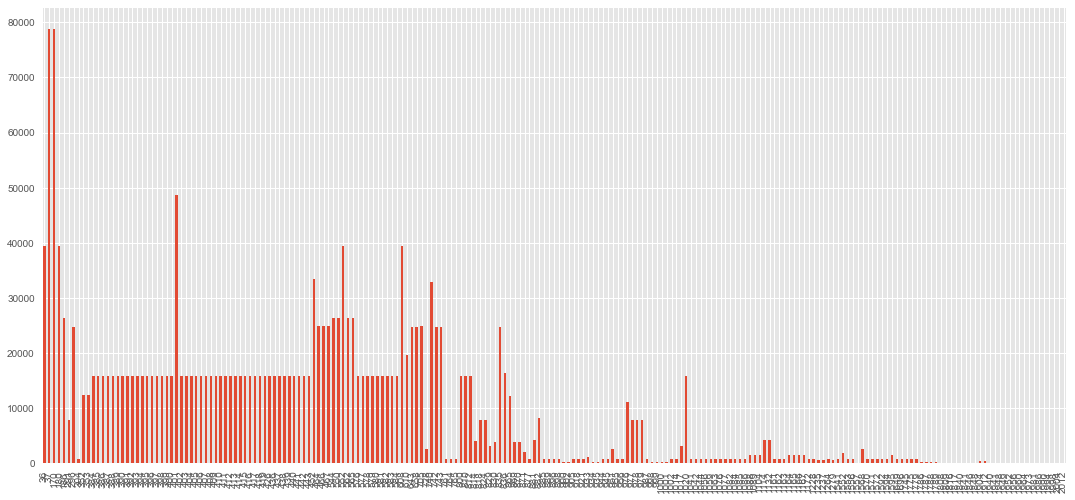

In [10]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=5.0)
cnt.plot(kind='bar', ax=ax)
ax.tick_params(axis="x")
ax.tick_params(axis="y")

## Frequency Analysis of messages

15771
Analyzing Timestamp and Data Rate of Message ID: 180
Interquartile Range of Rate for Message ID: 180 is 0.4930667595448597 


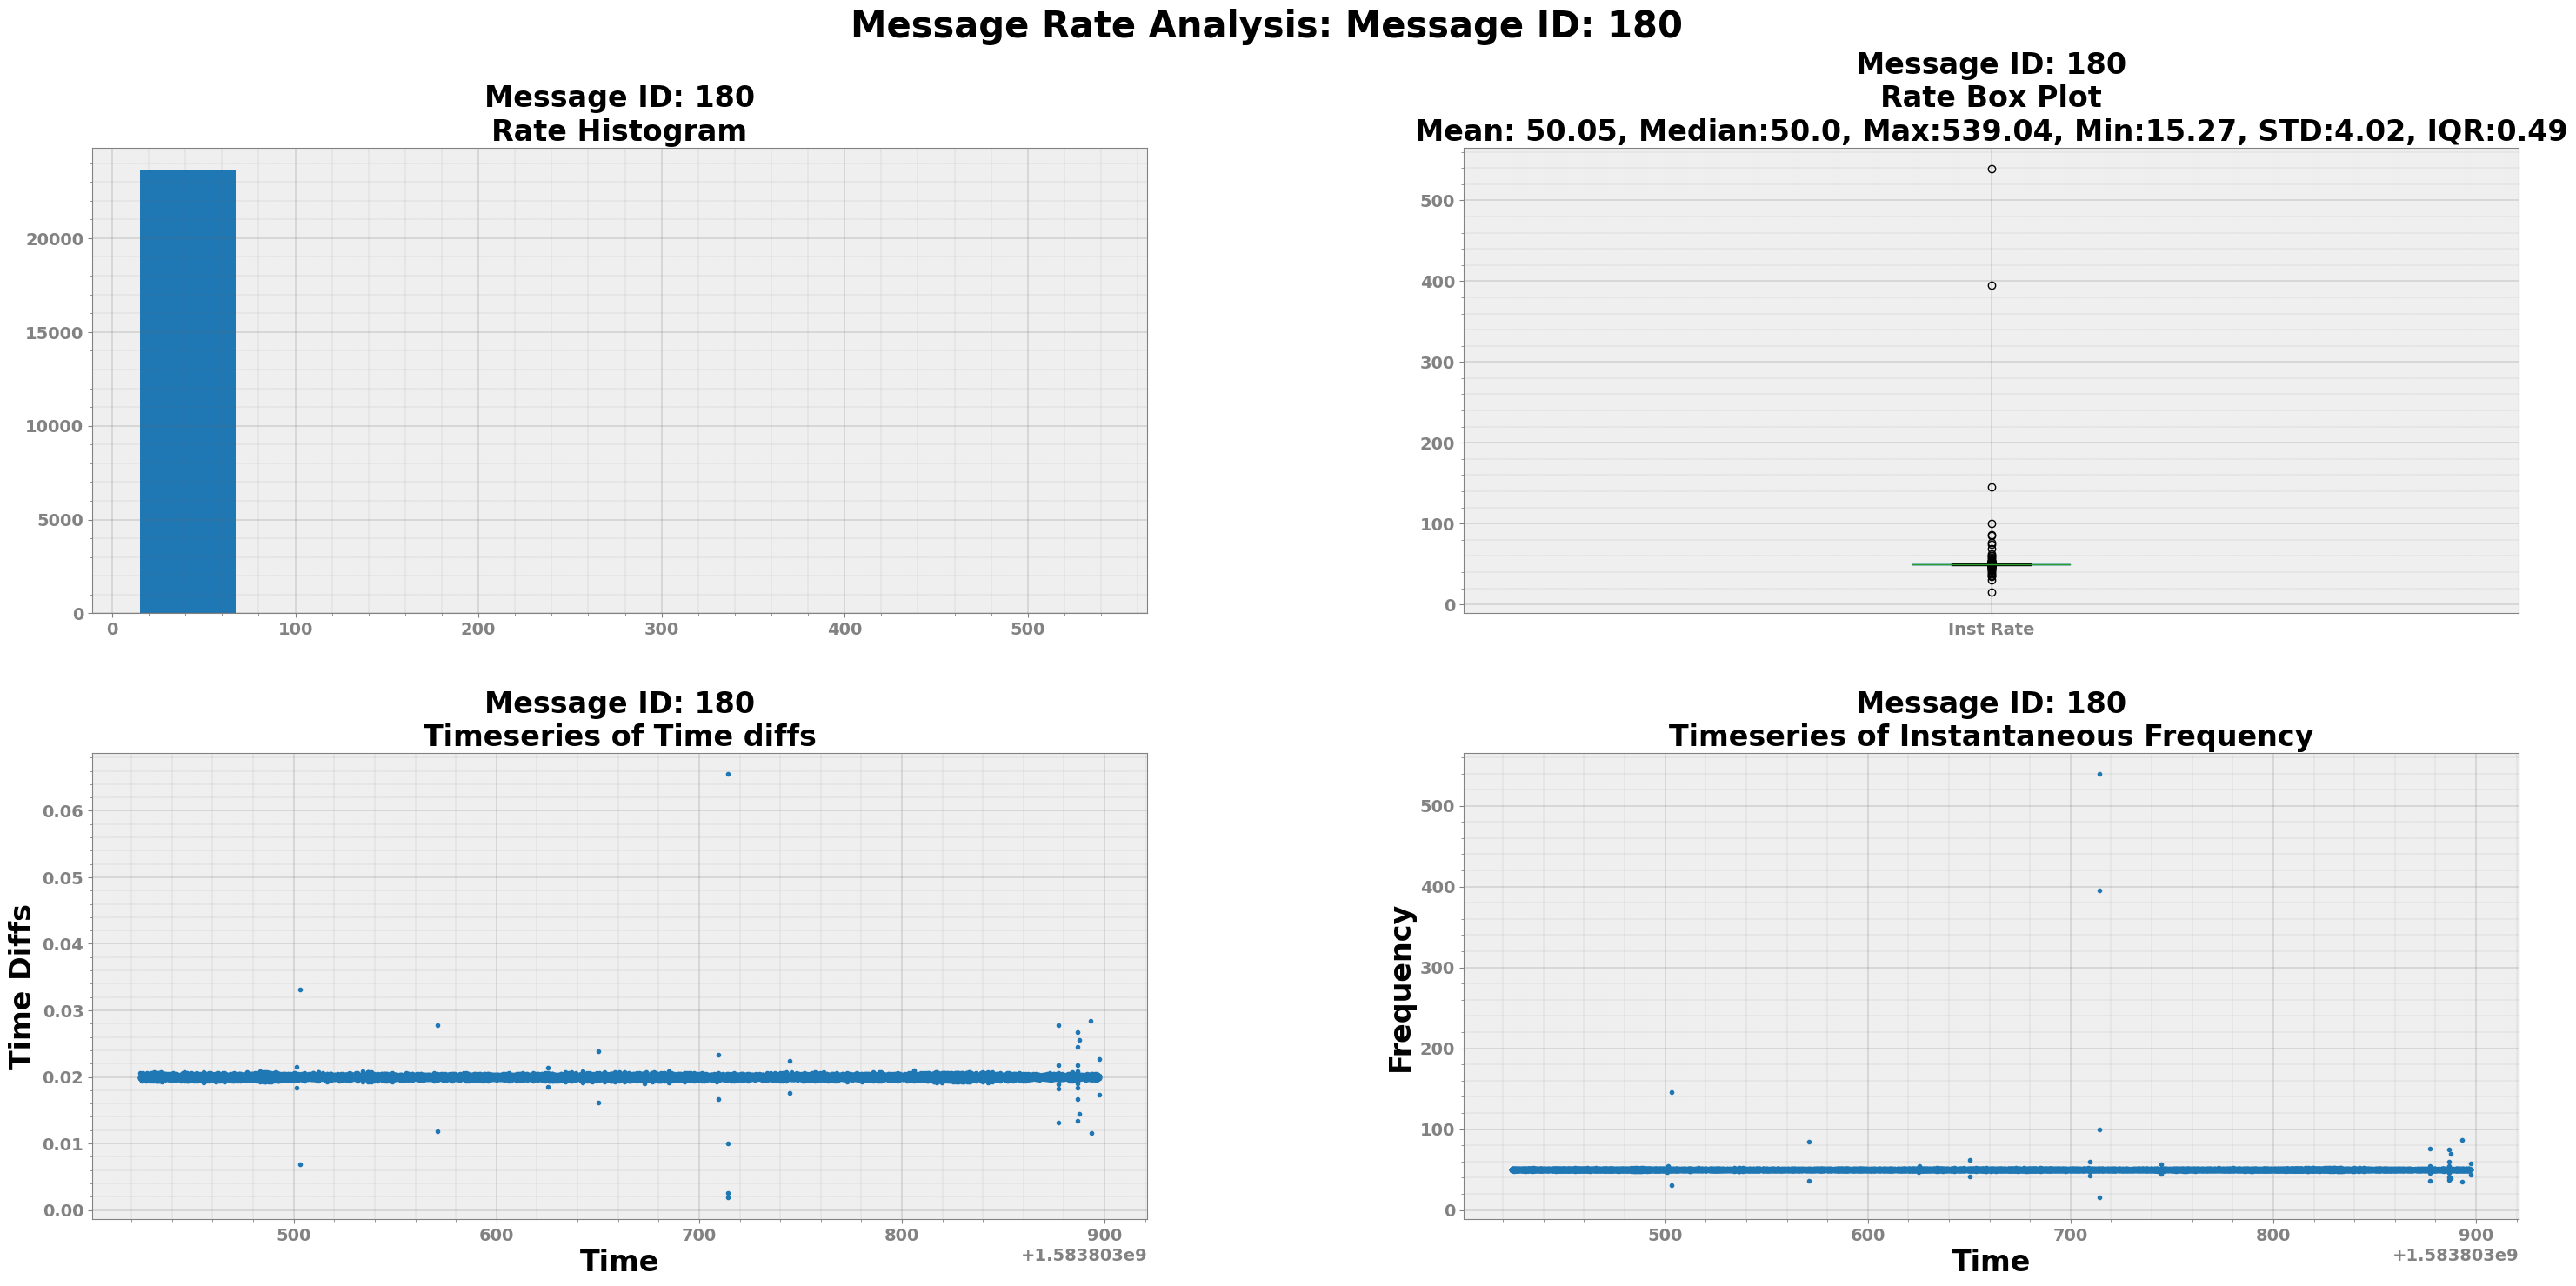

31542
Analyzing Timestamp and Data Rate of Message ID: 37
Interquartile Range of Rate for Message ID: 37 is 2.6941013143838575 


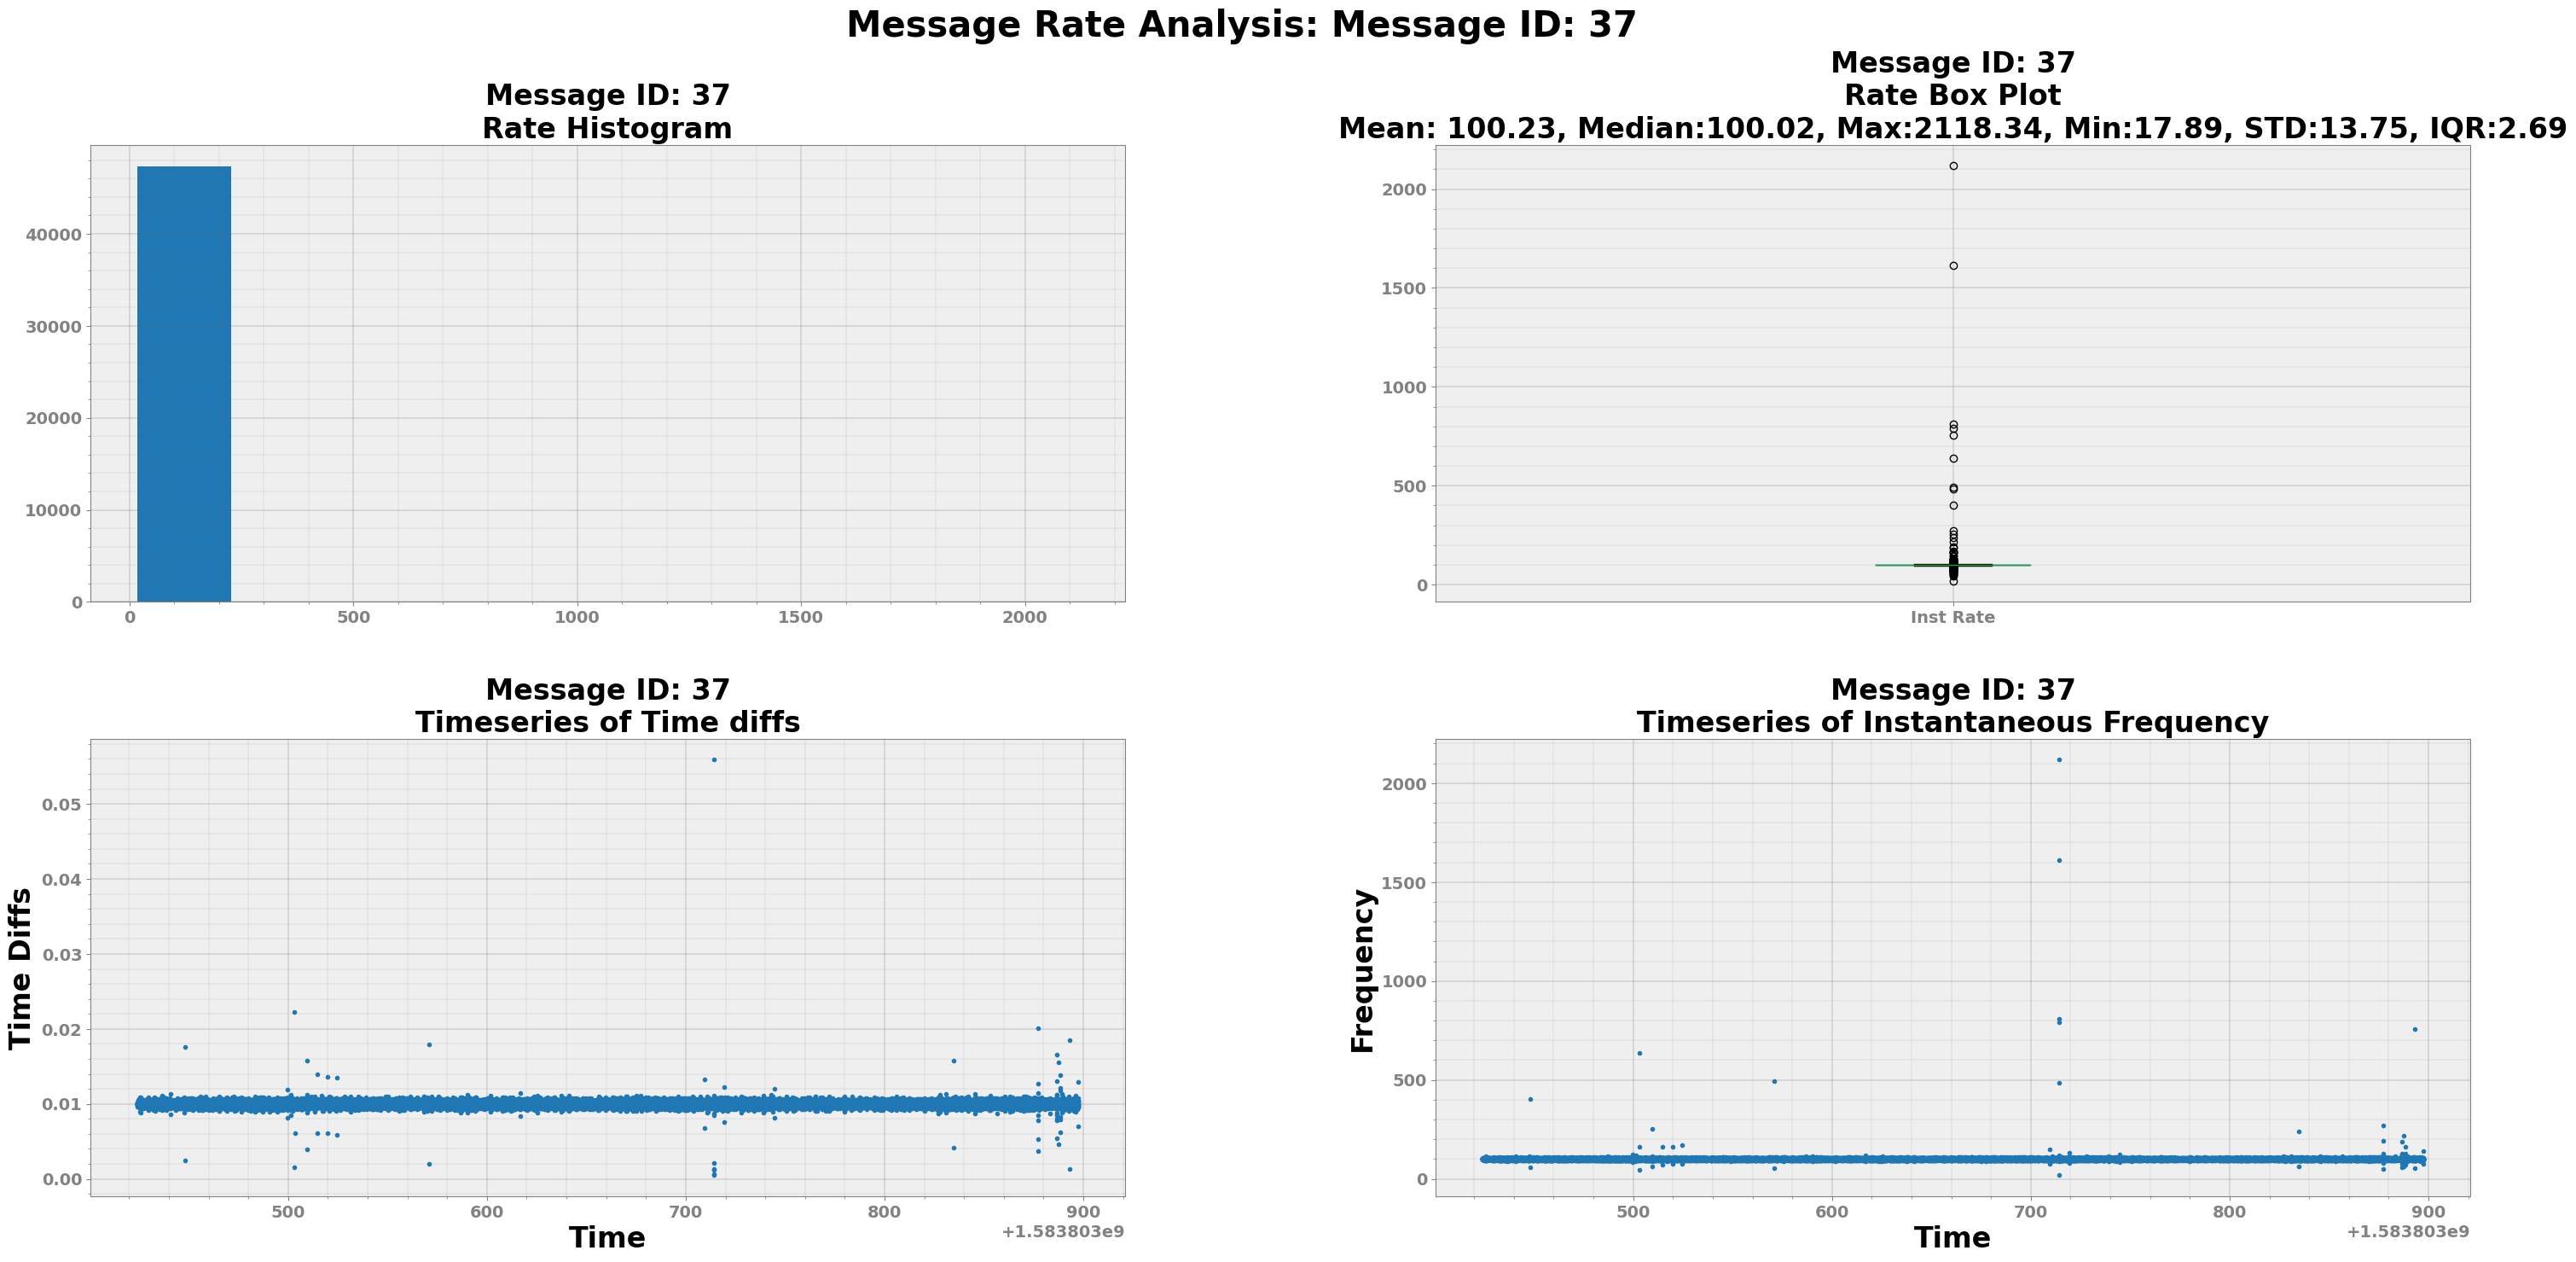

6308
Analyzing Timestamp and Data Rate of Message ID: 384
Interquartile Range of Rate for Message ID: 384 is 0.12435701215000705 


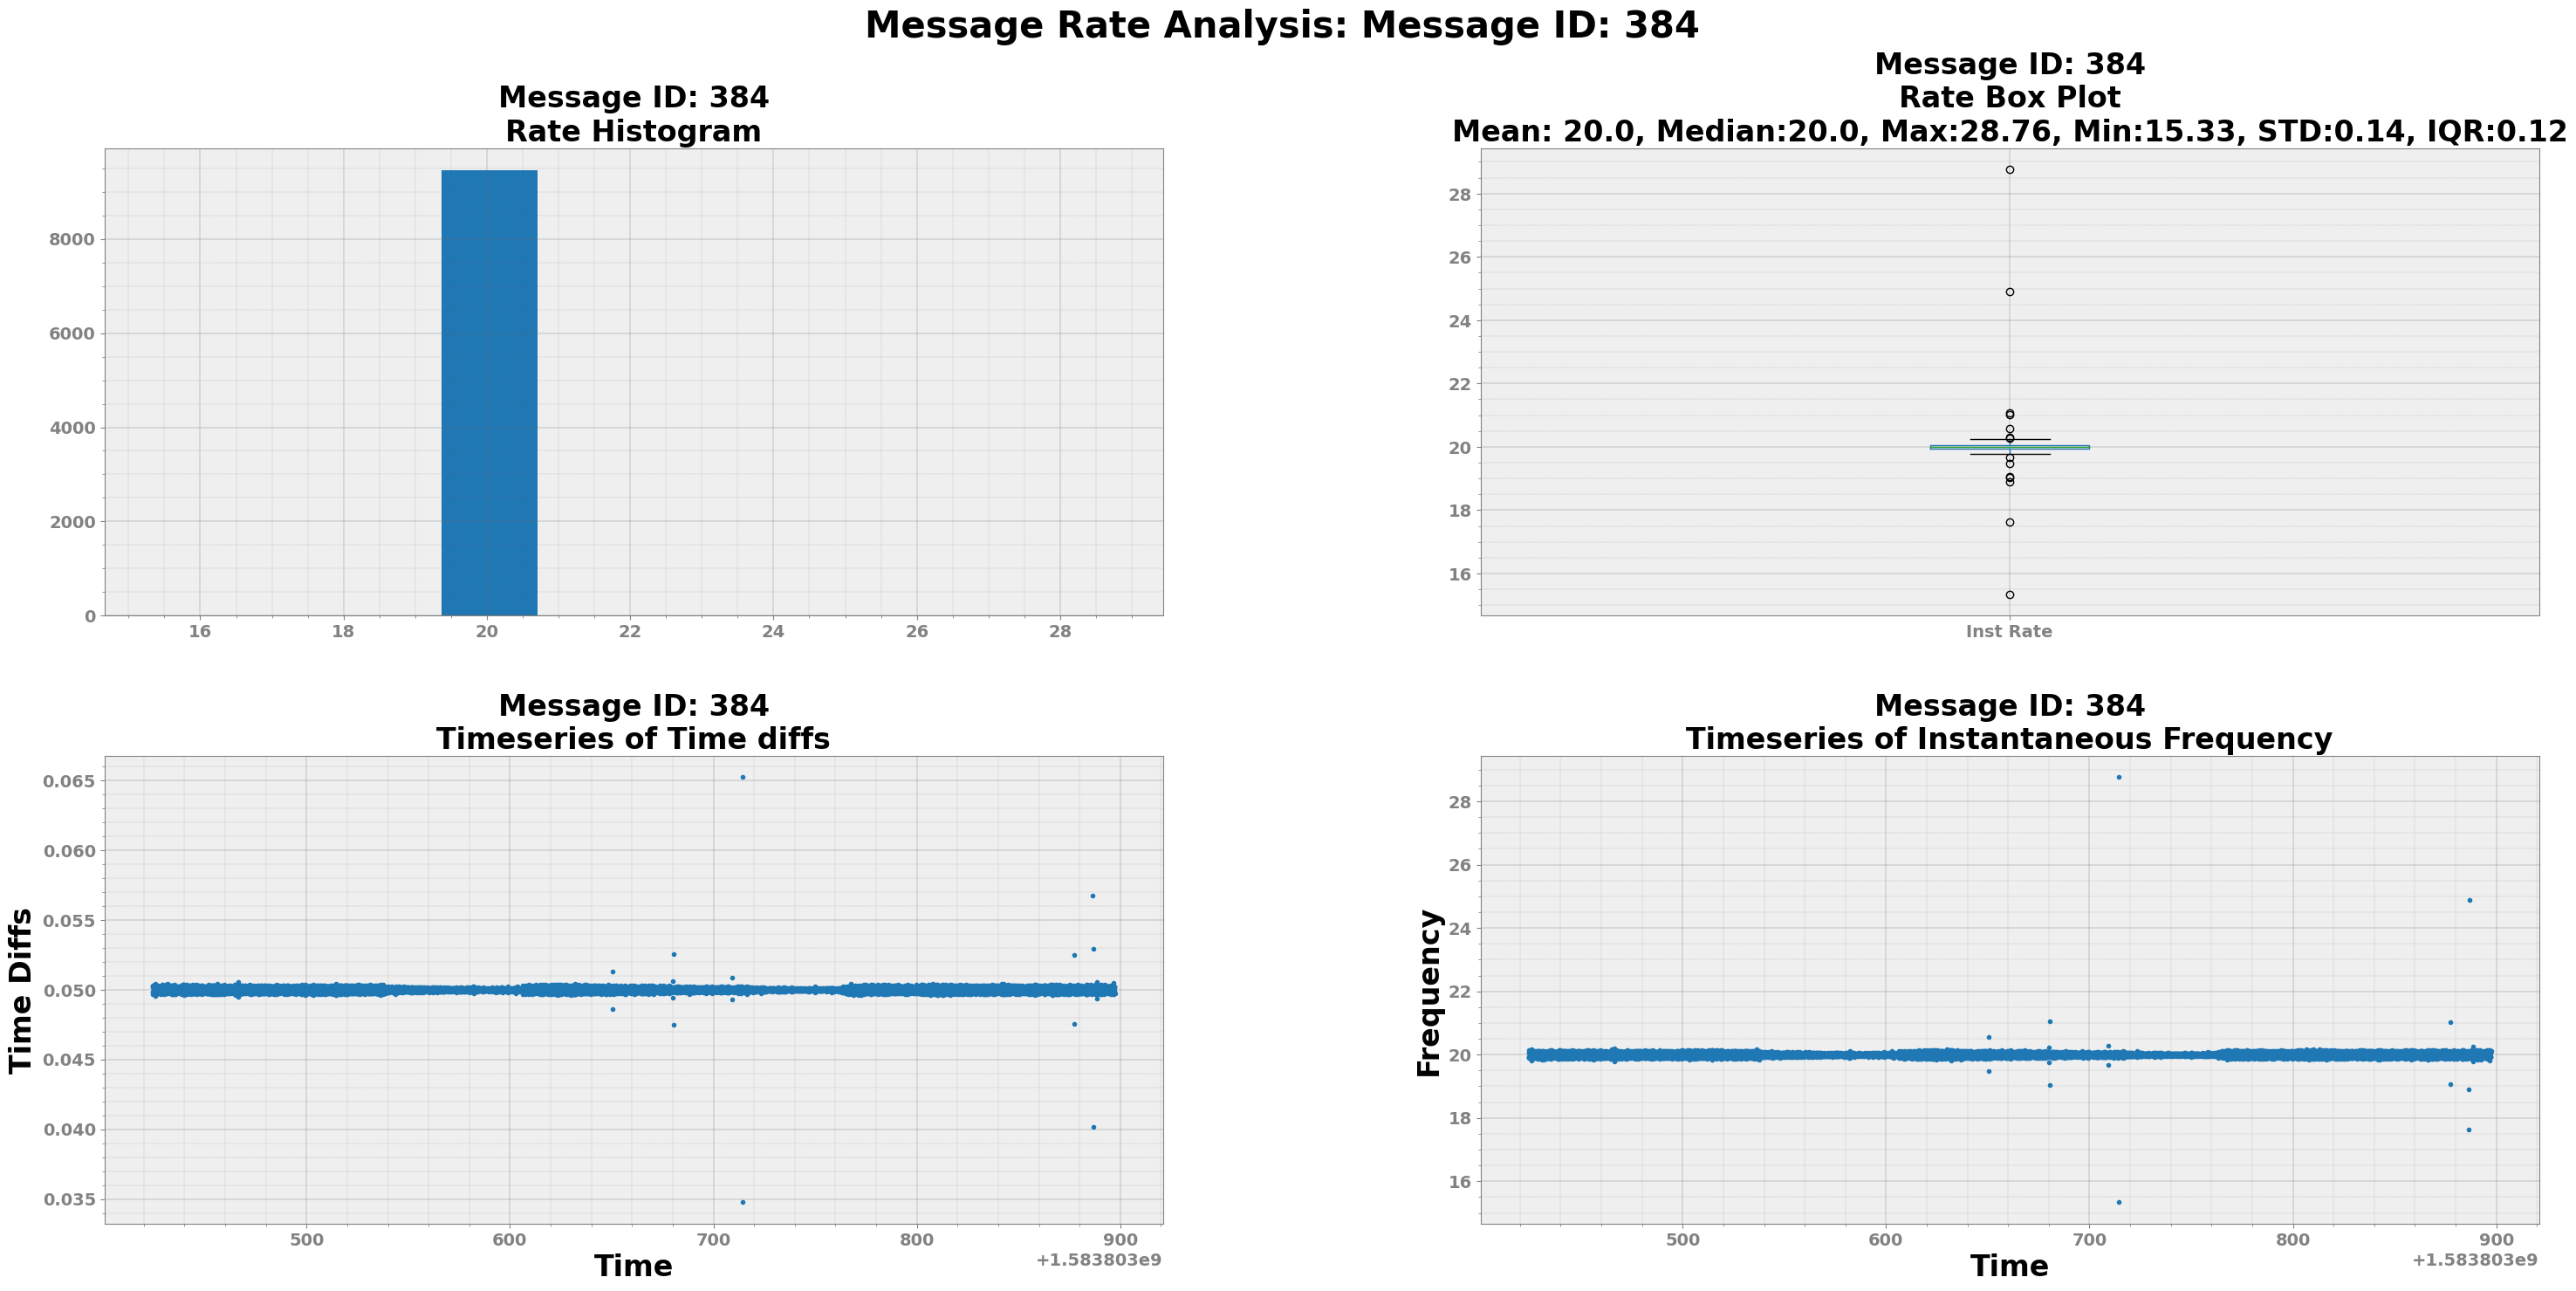

In [11]:
for index in msgsOfInterest: #cnt.index:
    m_data = cframe[cframe['MessageID'] == index ]
    n_msg = m_data.shape[0]
    percent = 40
    n_msg_to_trunc = (n_msg*percent)/100
    n_msg_to_trunc= int(n_msg_to_trunc)
    print(n_msg_to_trunc)
    m_data = m_data[n_msg_to_trunc:]

    strym.ranalyze(m_data, title ="Message ID: " + str(index), savefig = False)

## Reading data captured using Py Code

In [12]:
pydata = '/home/ivory/CyverseData/JmscslgroupData/PandaData/2020_03_06/2020-03-06-11-51-50-261530__CAN_Messages.csv'
pyframe = pd.read_csv(pydata)

In [13]:
pysorted = pyframe.sort_values(by='MessageID')
pycnt = pysorted['MessageID'].value_counts()
pycnt = pycnt.sort_index(ascending=True)


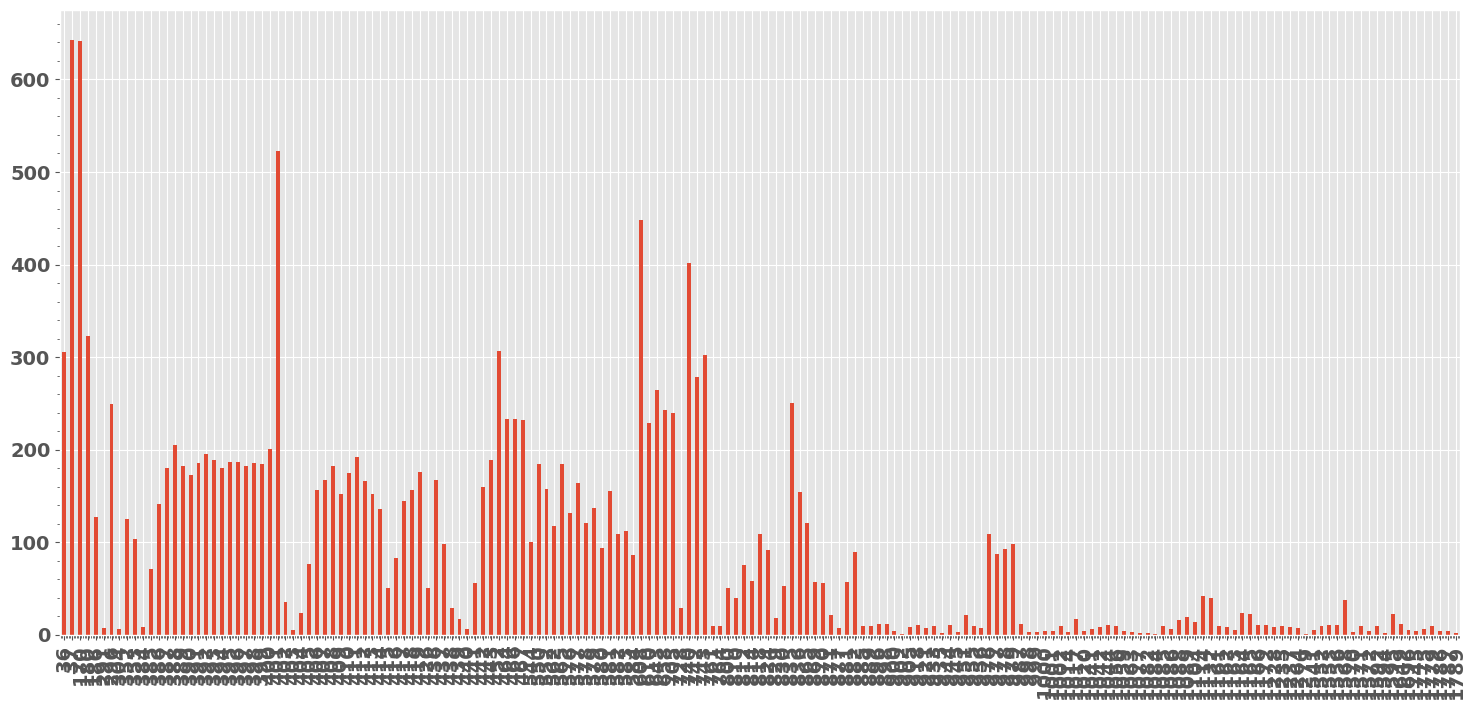

In [14]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=5.0)
pycnt.plot(kind='bar', ax=ax)
ax.tick_params(axis="x")
ax.tick_params(axis="y")

Analyzing Timestamp and Data Rate of Message ID: 180
Interquartile Range of Rate for Message ID: 180 is 25.034645805340013 


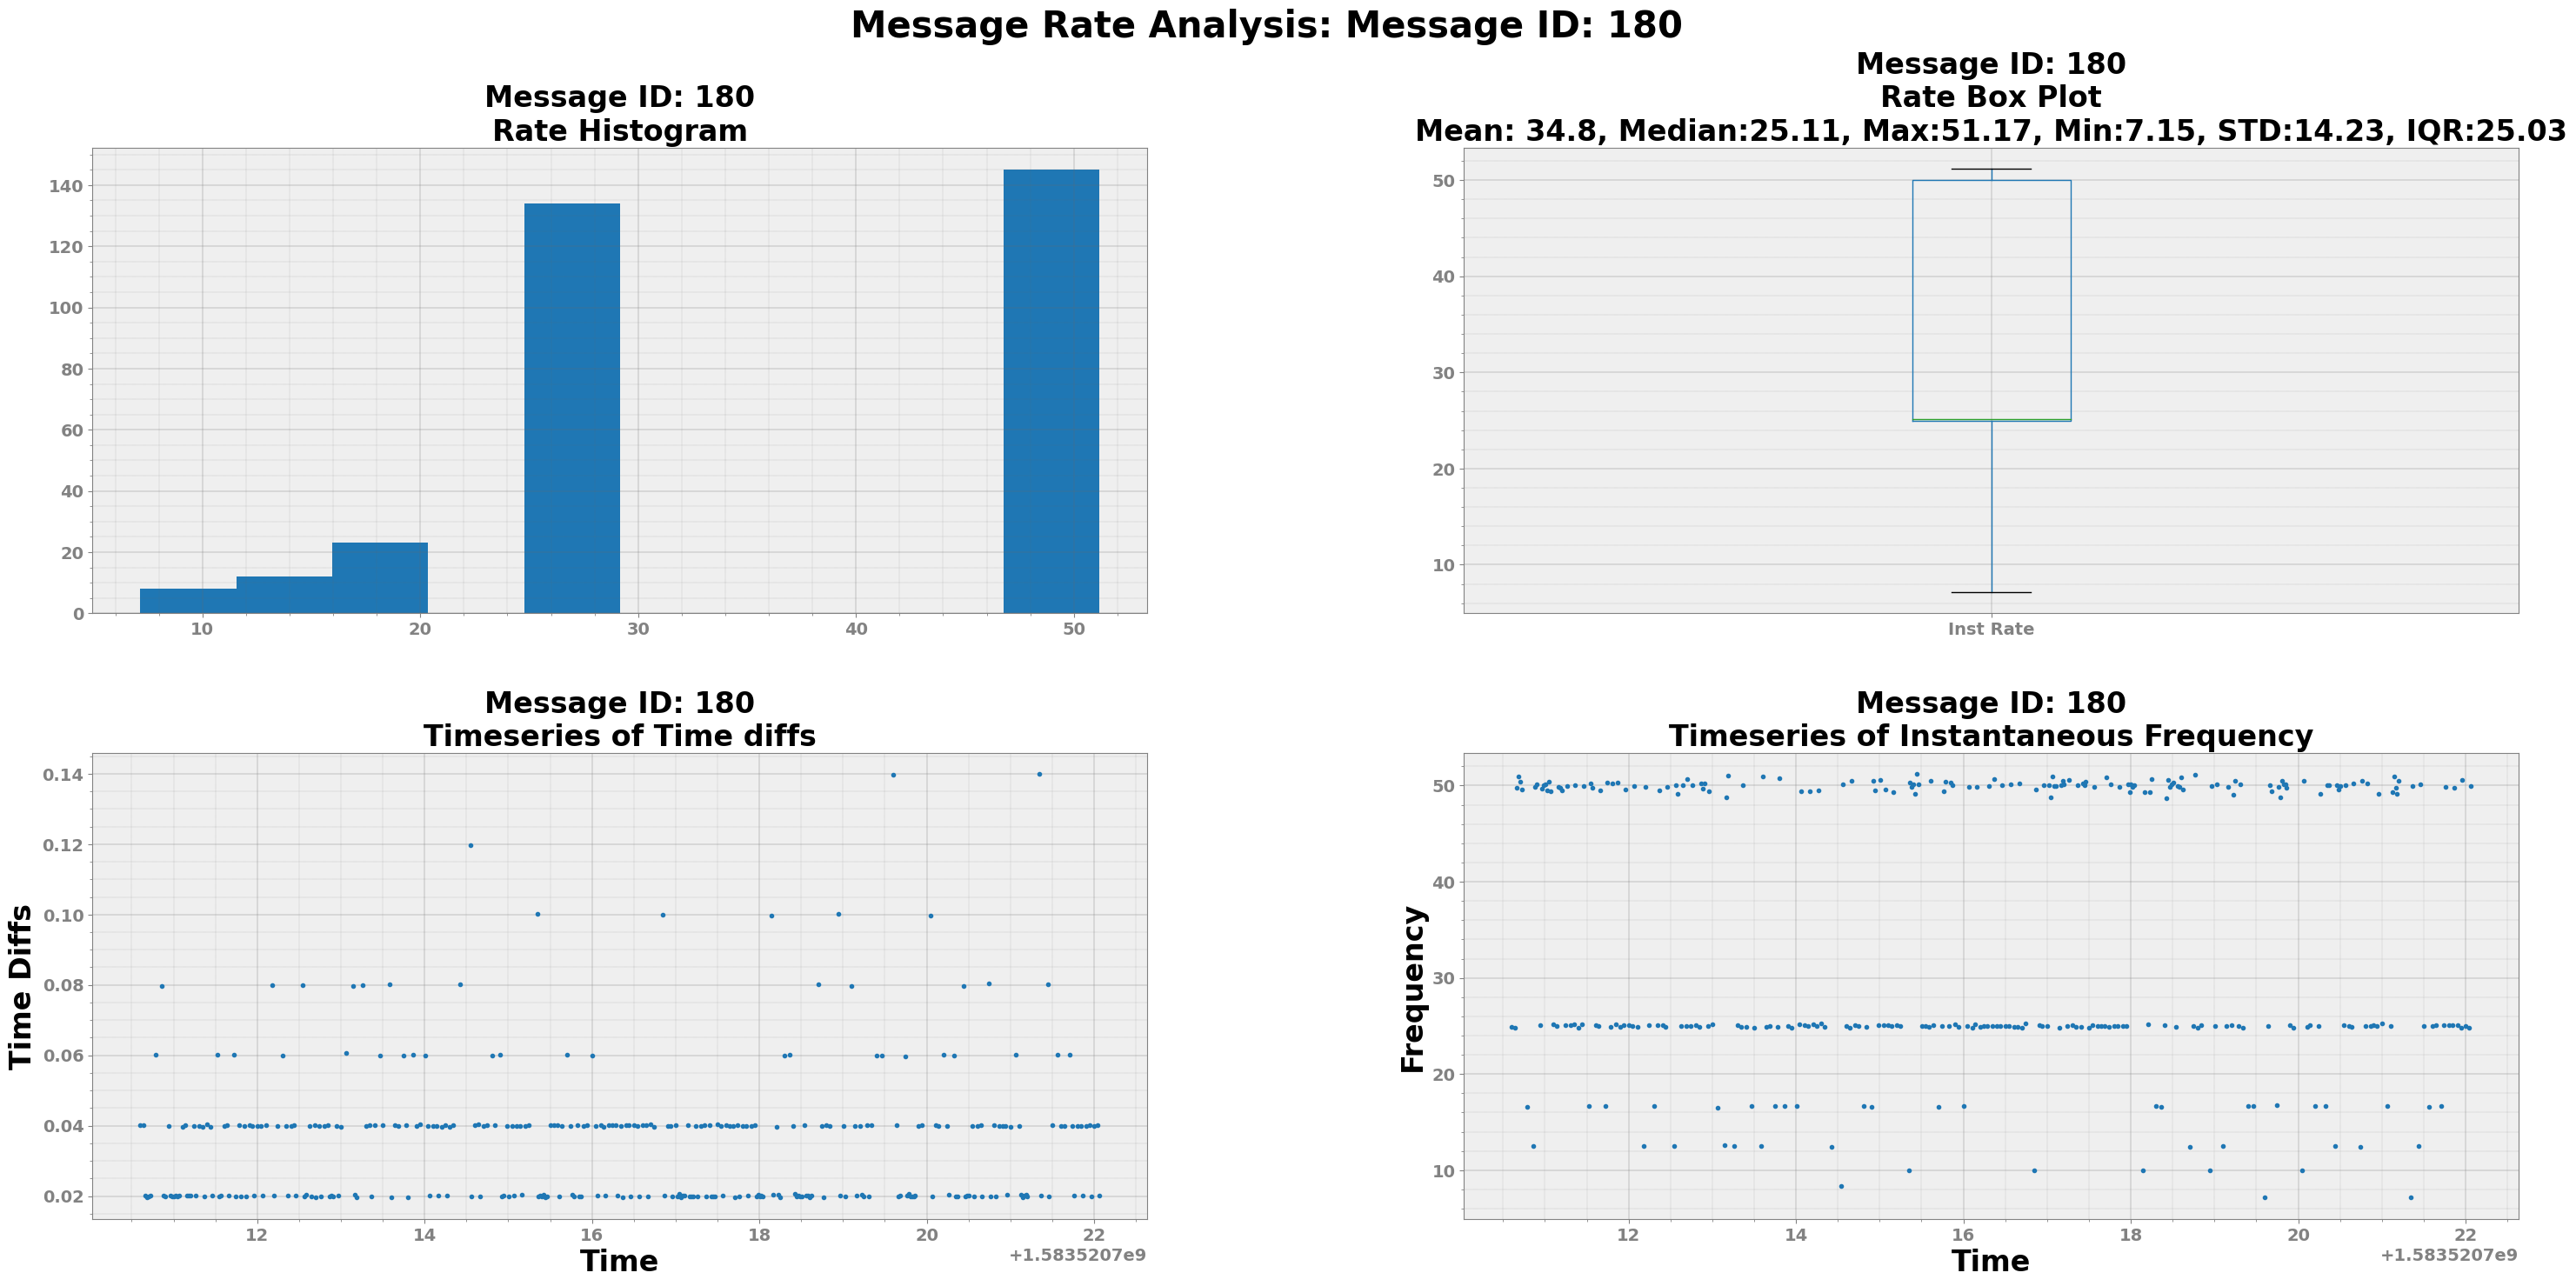

Analyzing Timestamp and Data Rate of Message ID: 37
Interquartile Range of Rate for Message ID: 37 is 50.930100799152754 


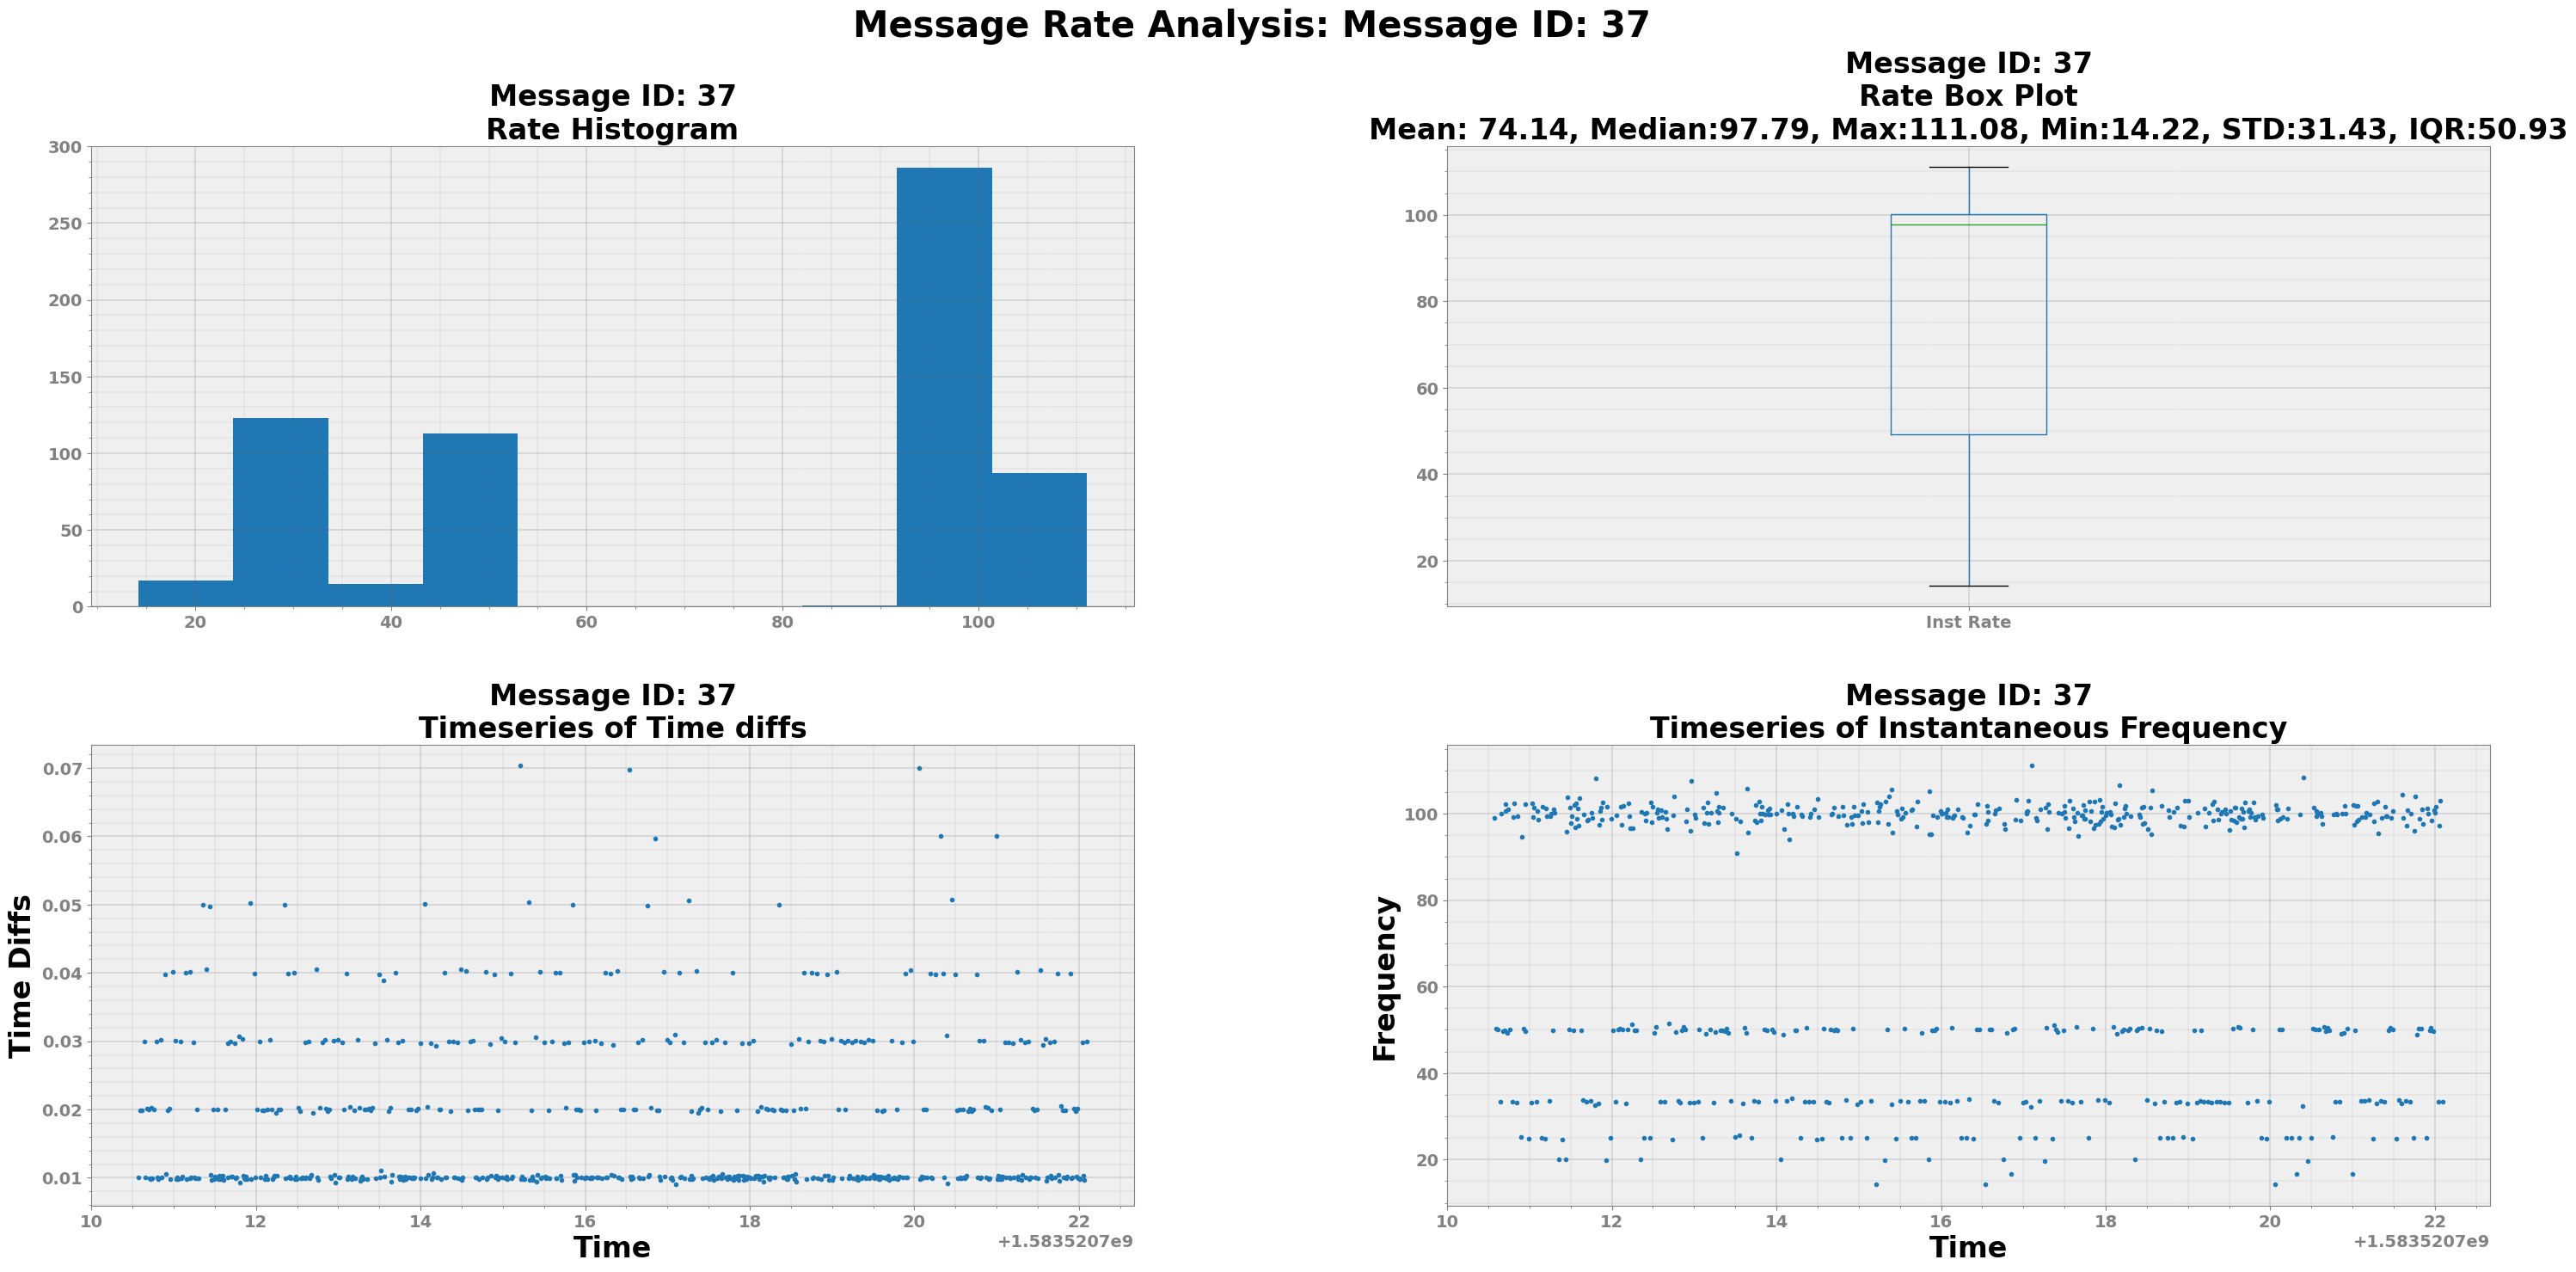

Analyzing Timestamp and Data Rate of Message ID: 384
Interquartile Range of Rate for Message ID: 384 is 2.7788708744077715 


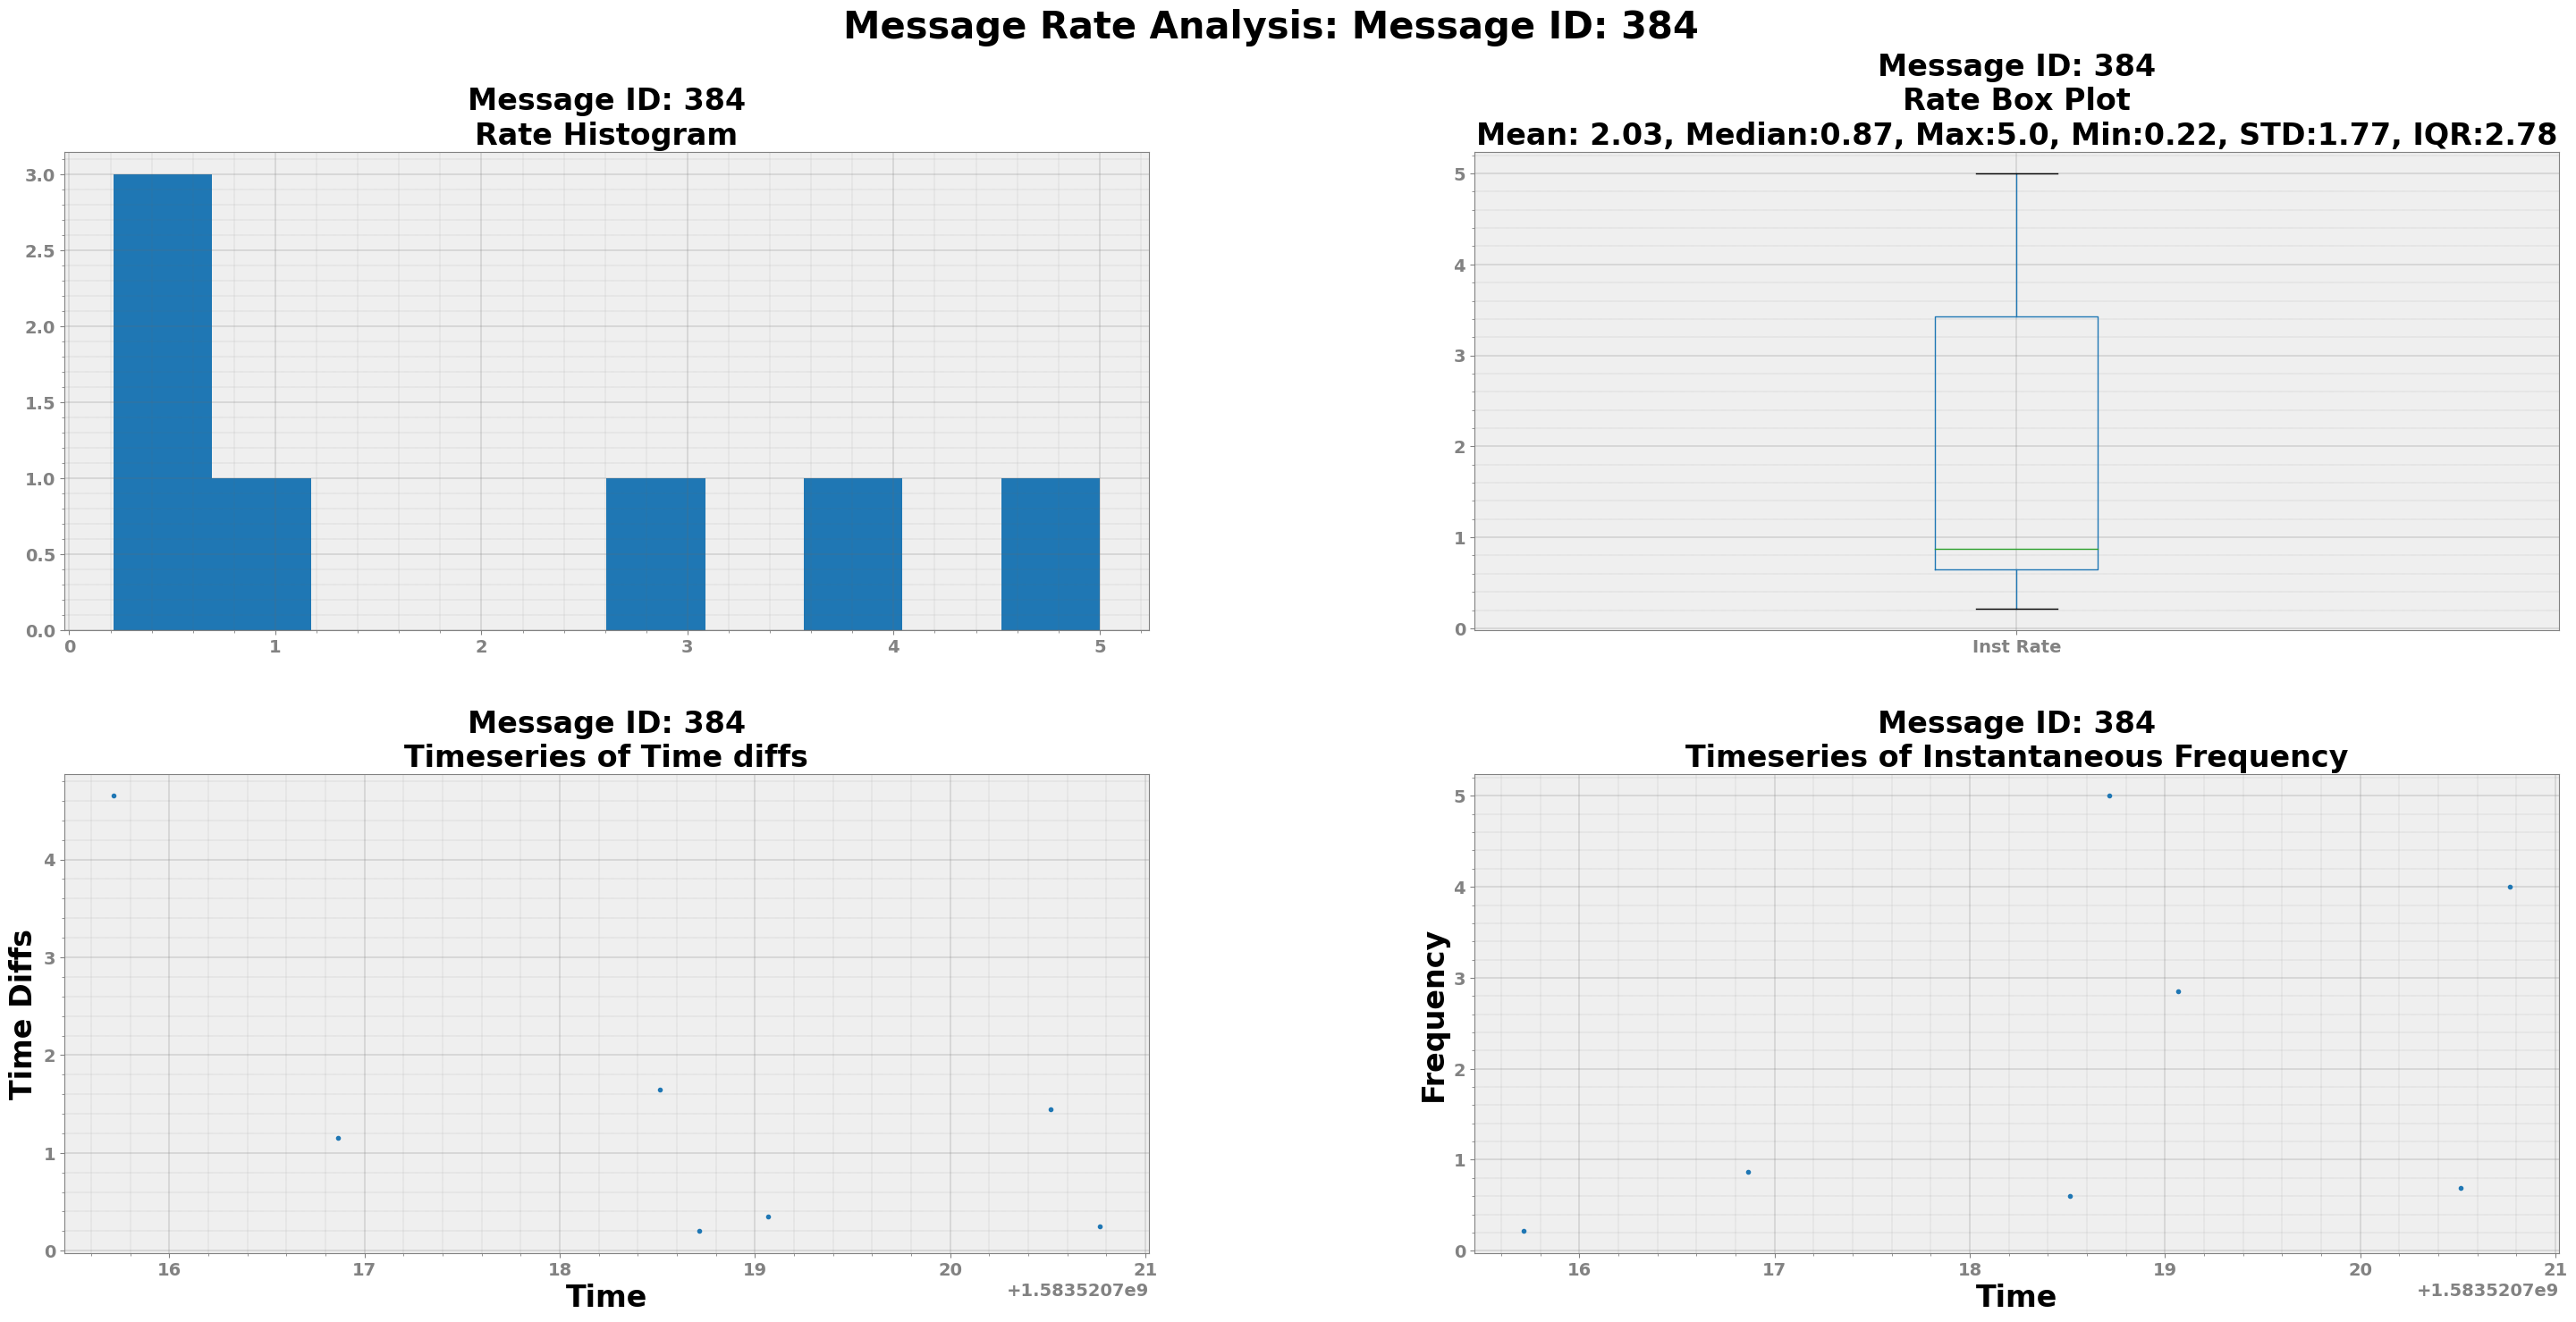

In [15]:
for index in msgsOfInterest: #pycnt.index:
    m_data = pyframe[pyframe['MessageID'] == index ]
    strym.ranalyze(m_data, title ="Message ID: " + str(index), savefig = False)

## Side by side comparison by data throughput    
    

Analyzing Timestamp and Data Rate of MessageID 180 Using Python
Interquartile Range of Rate for MessageID 180 Using Python is 25.034645805340013 


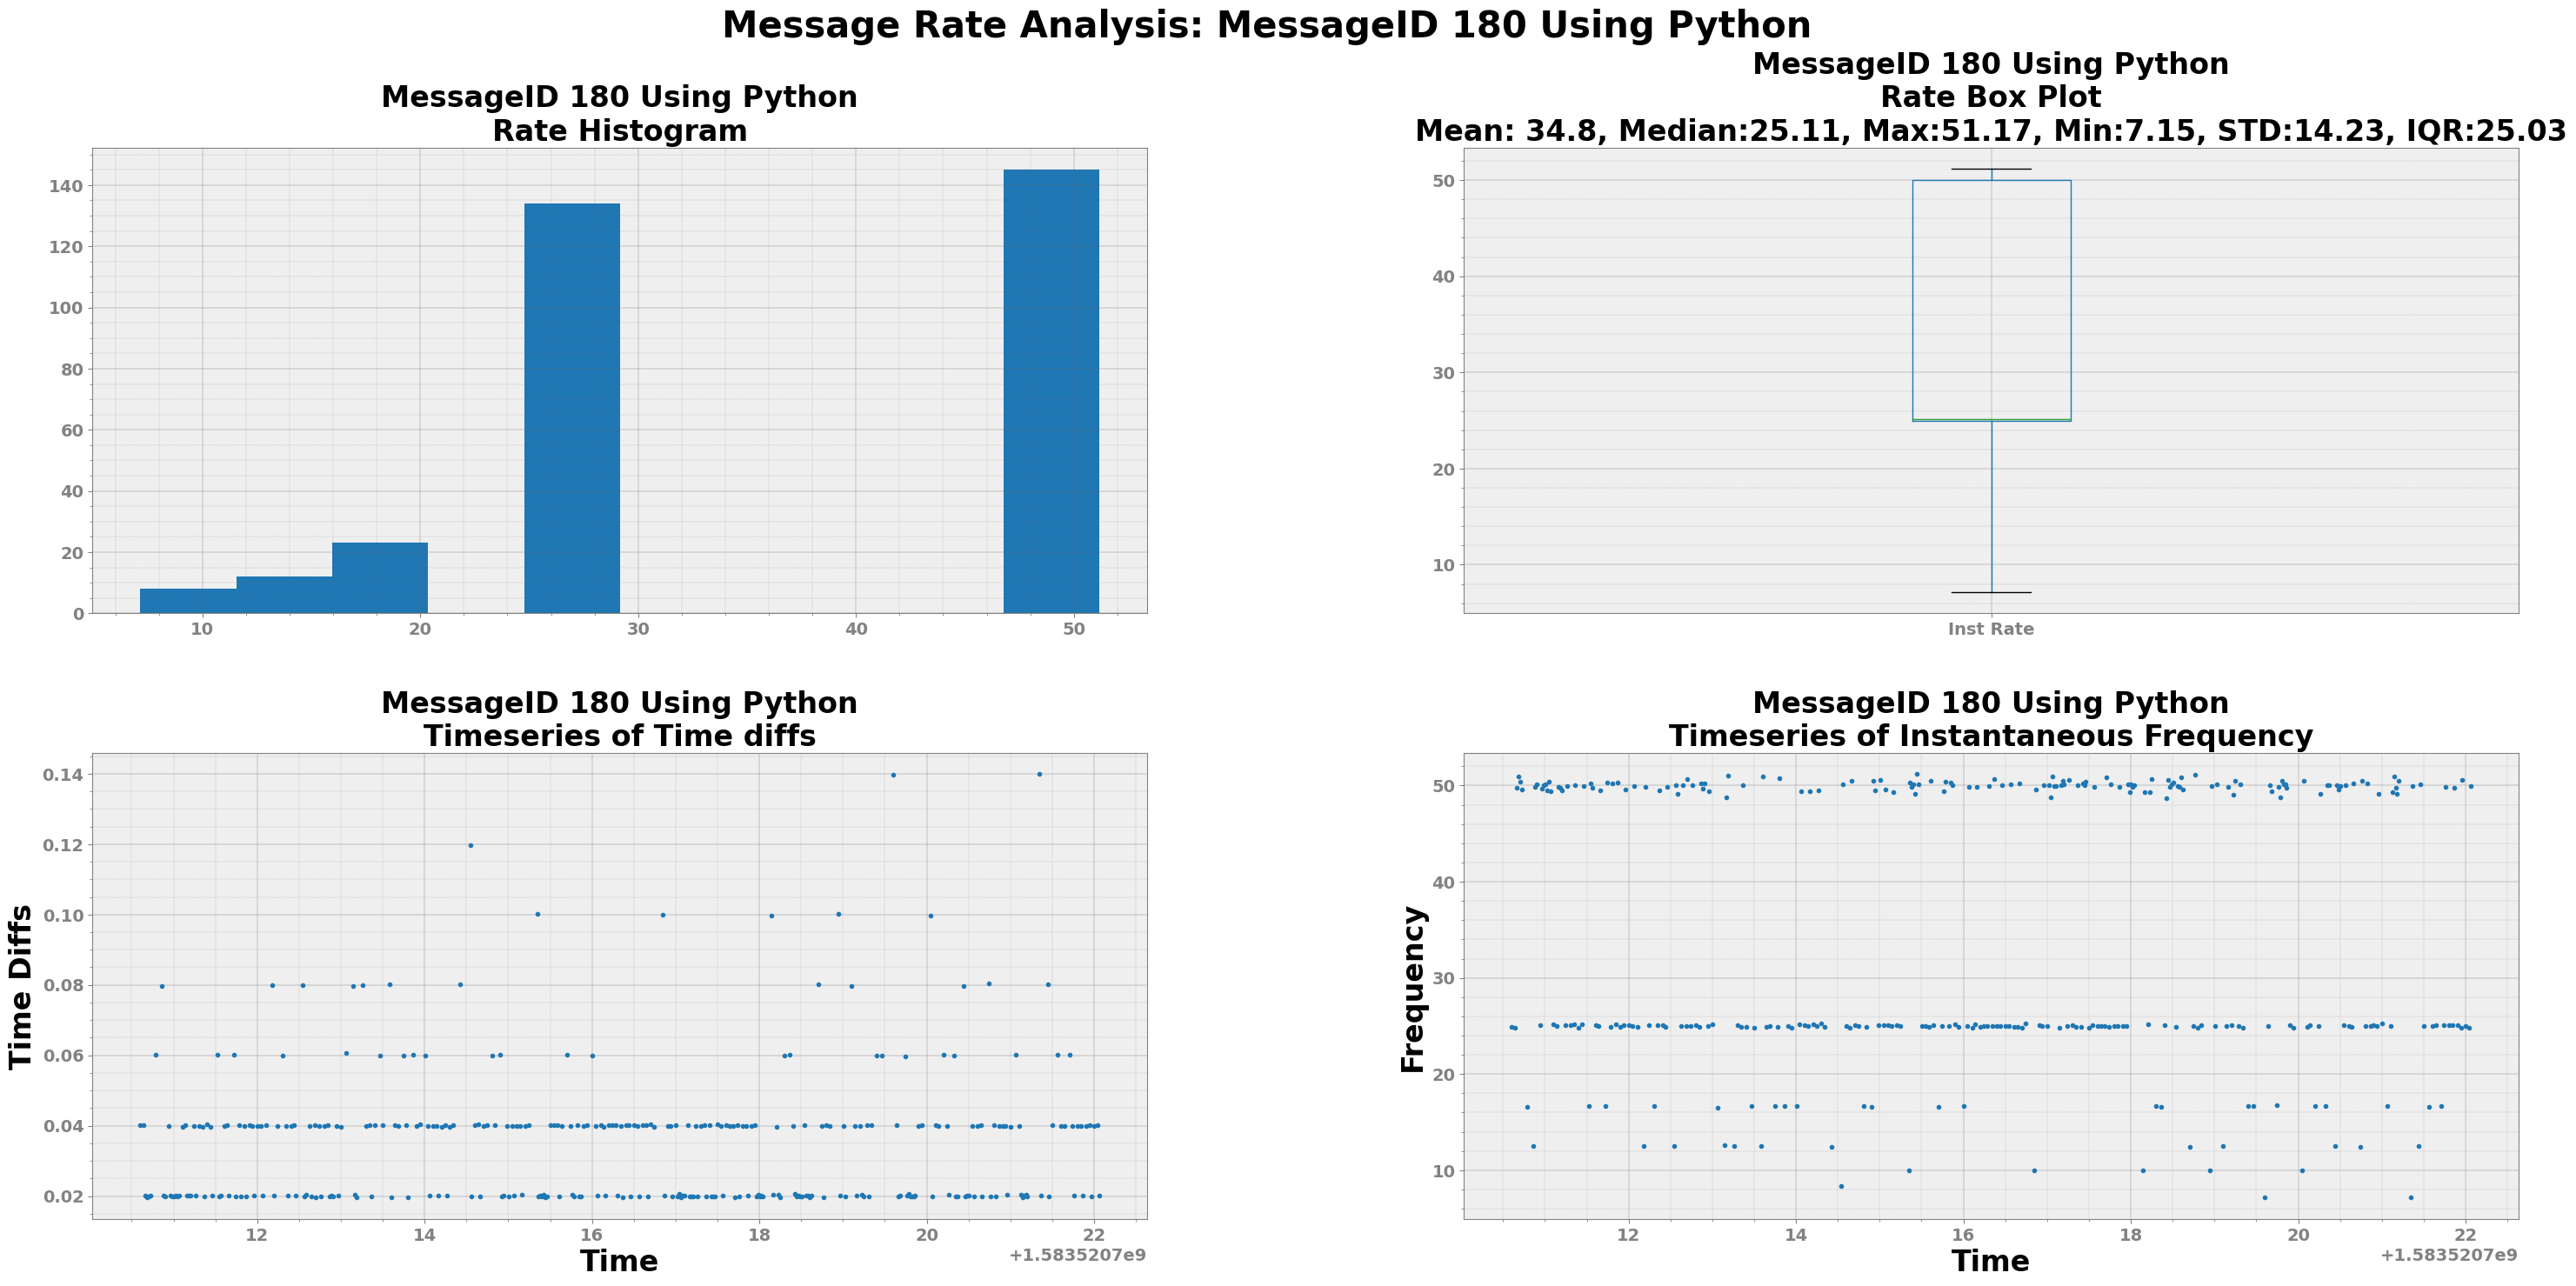

15771
Analyzing Timestamp and Data Rate of MessageID 180 Using C
Interquartile Range of Rate for MessageID 180 Using C is 0.4930667595448597 


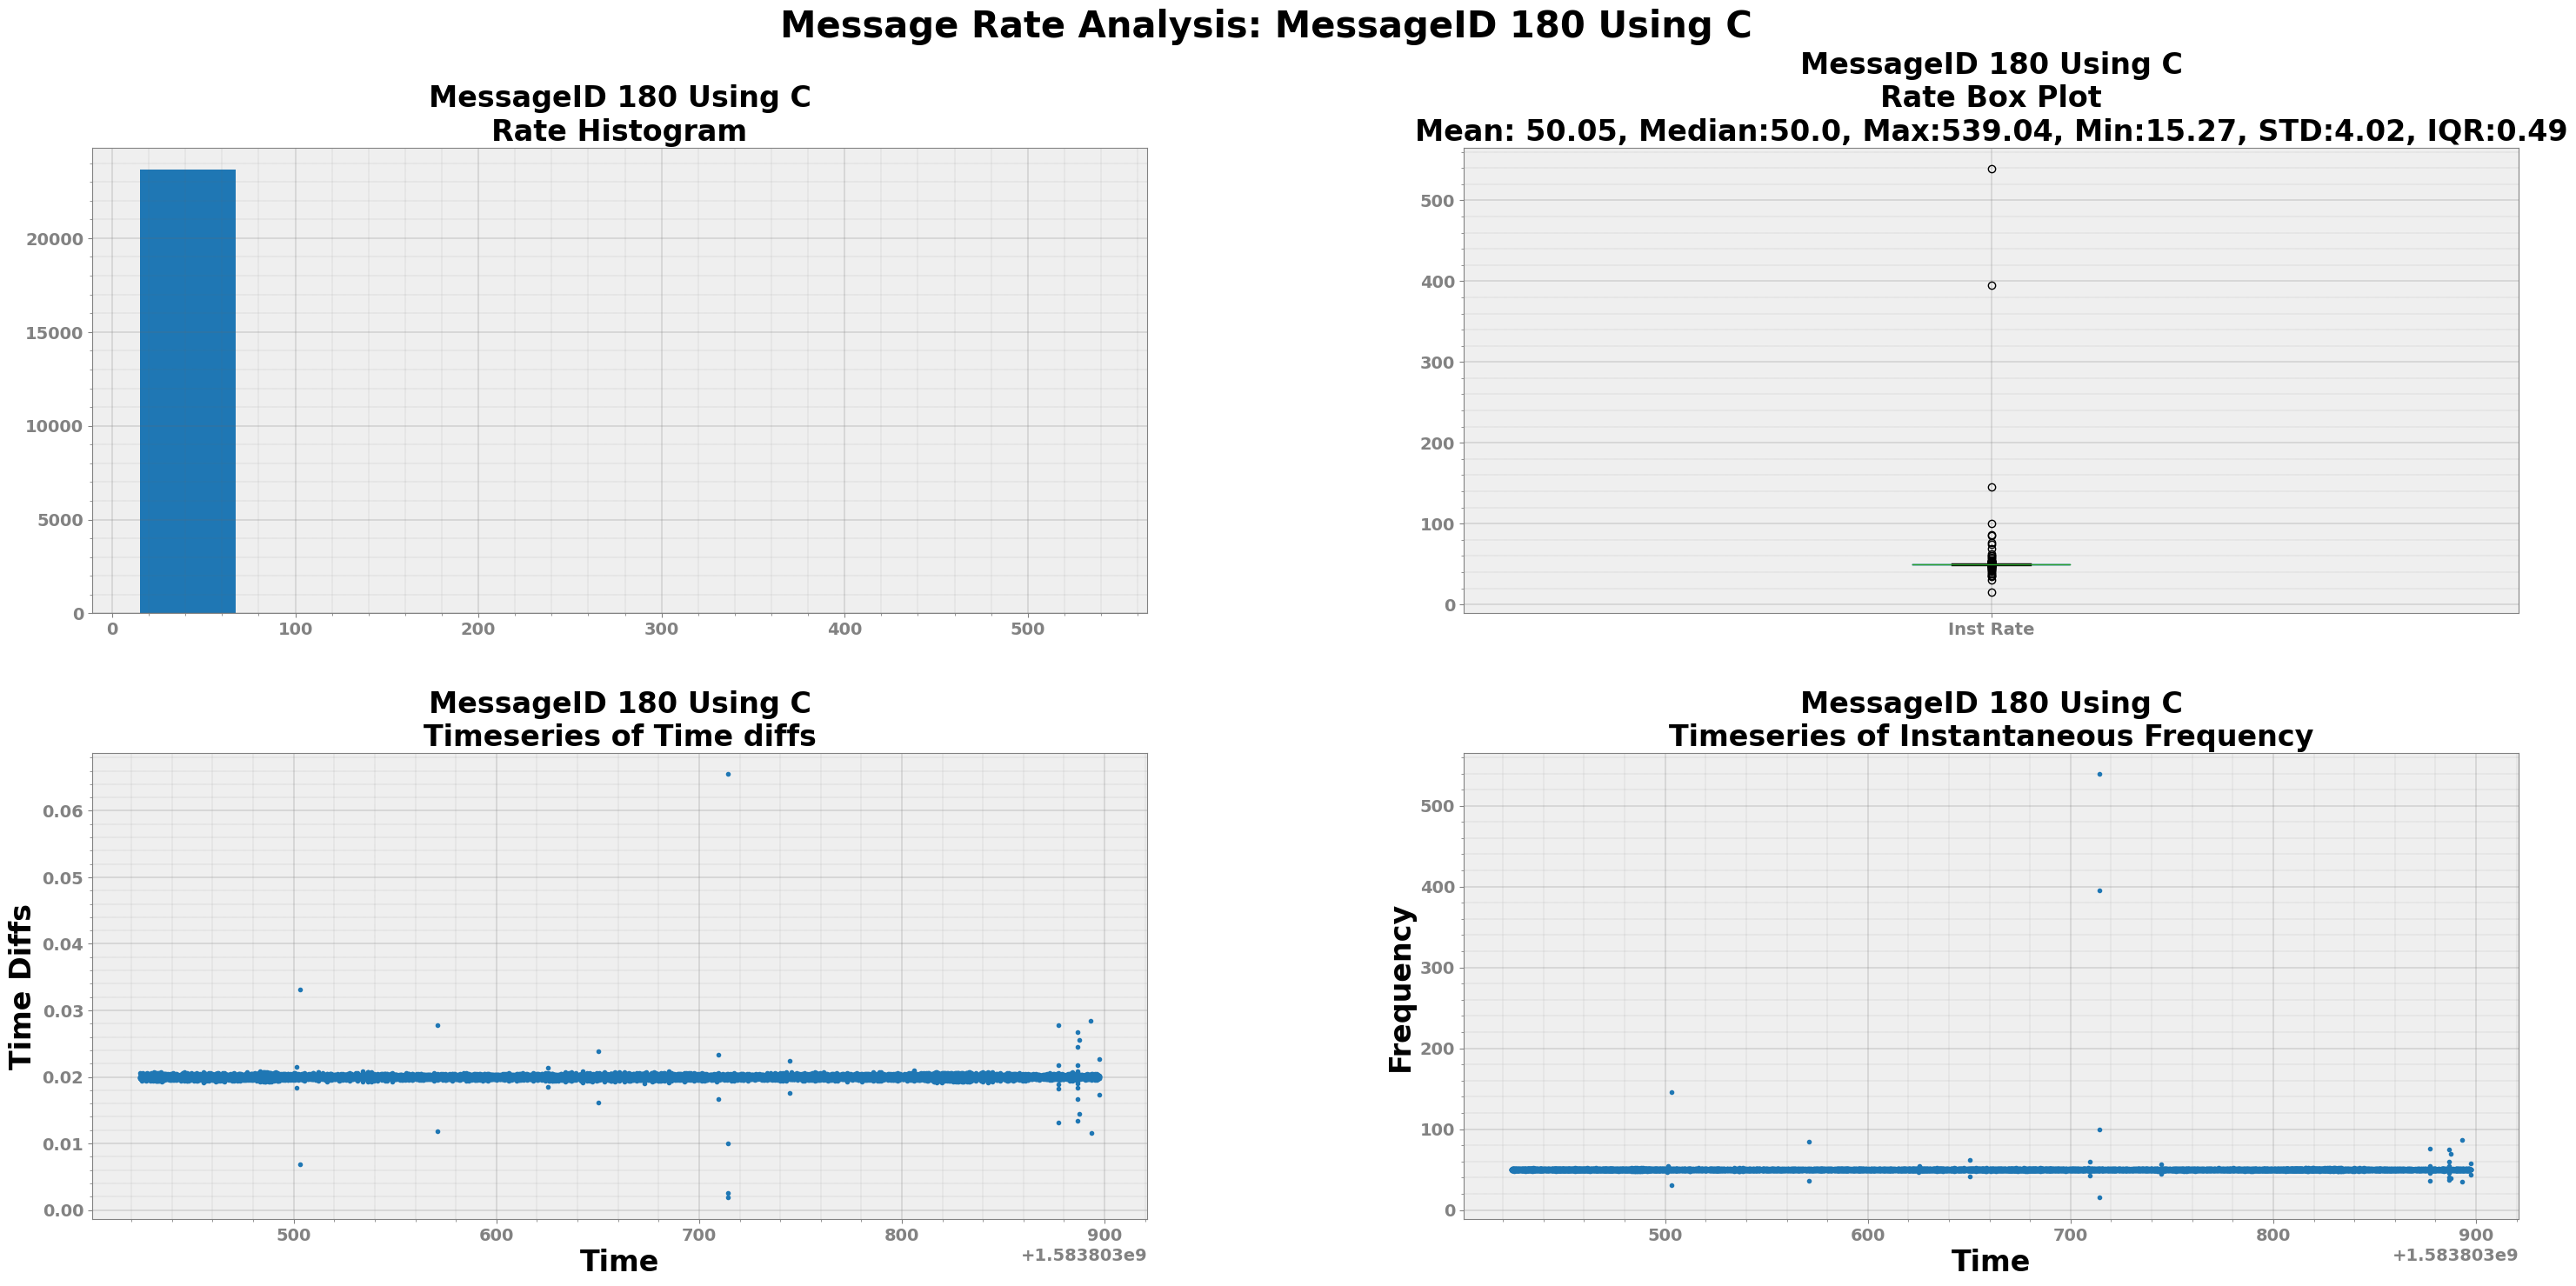

Analyzing Timestamp and Data Rate of MessageID 37 Using Python
Interquartile Range of Rate for MessageID 37 Using Python is 50.930100799152754 


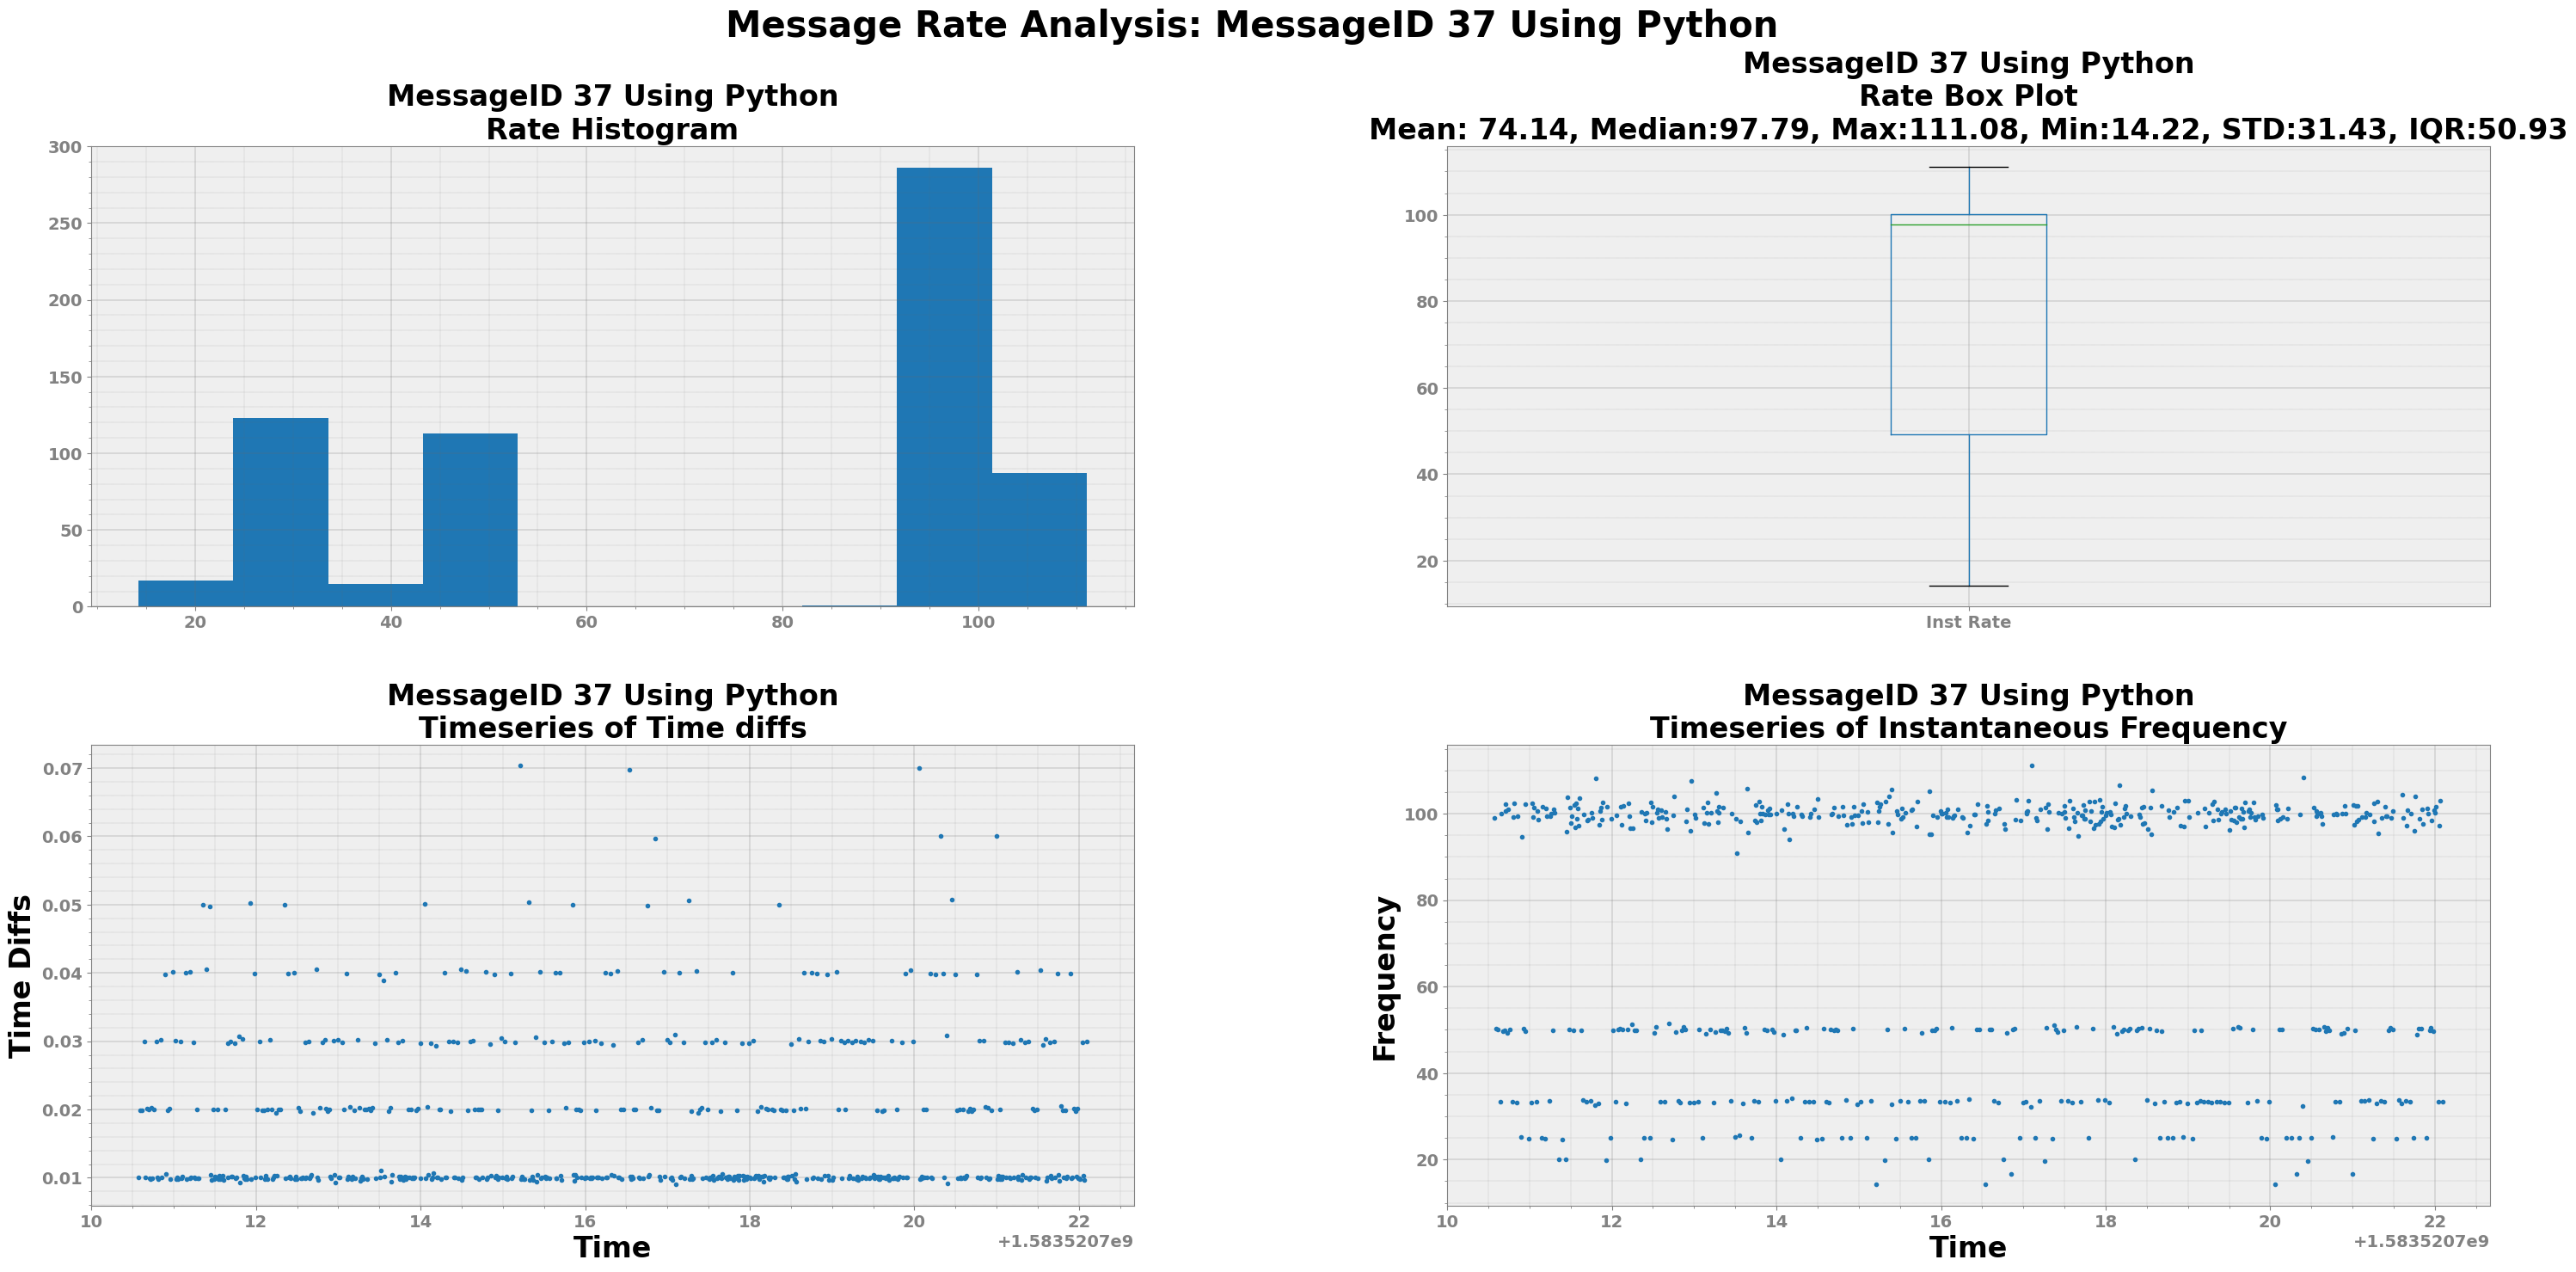

31542
Analyzing Timestamp and Data Rate of MessageID 37 Using C
Interquartile Range of Rate for MessageID 37 Using C is 2.6941013143838575 


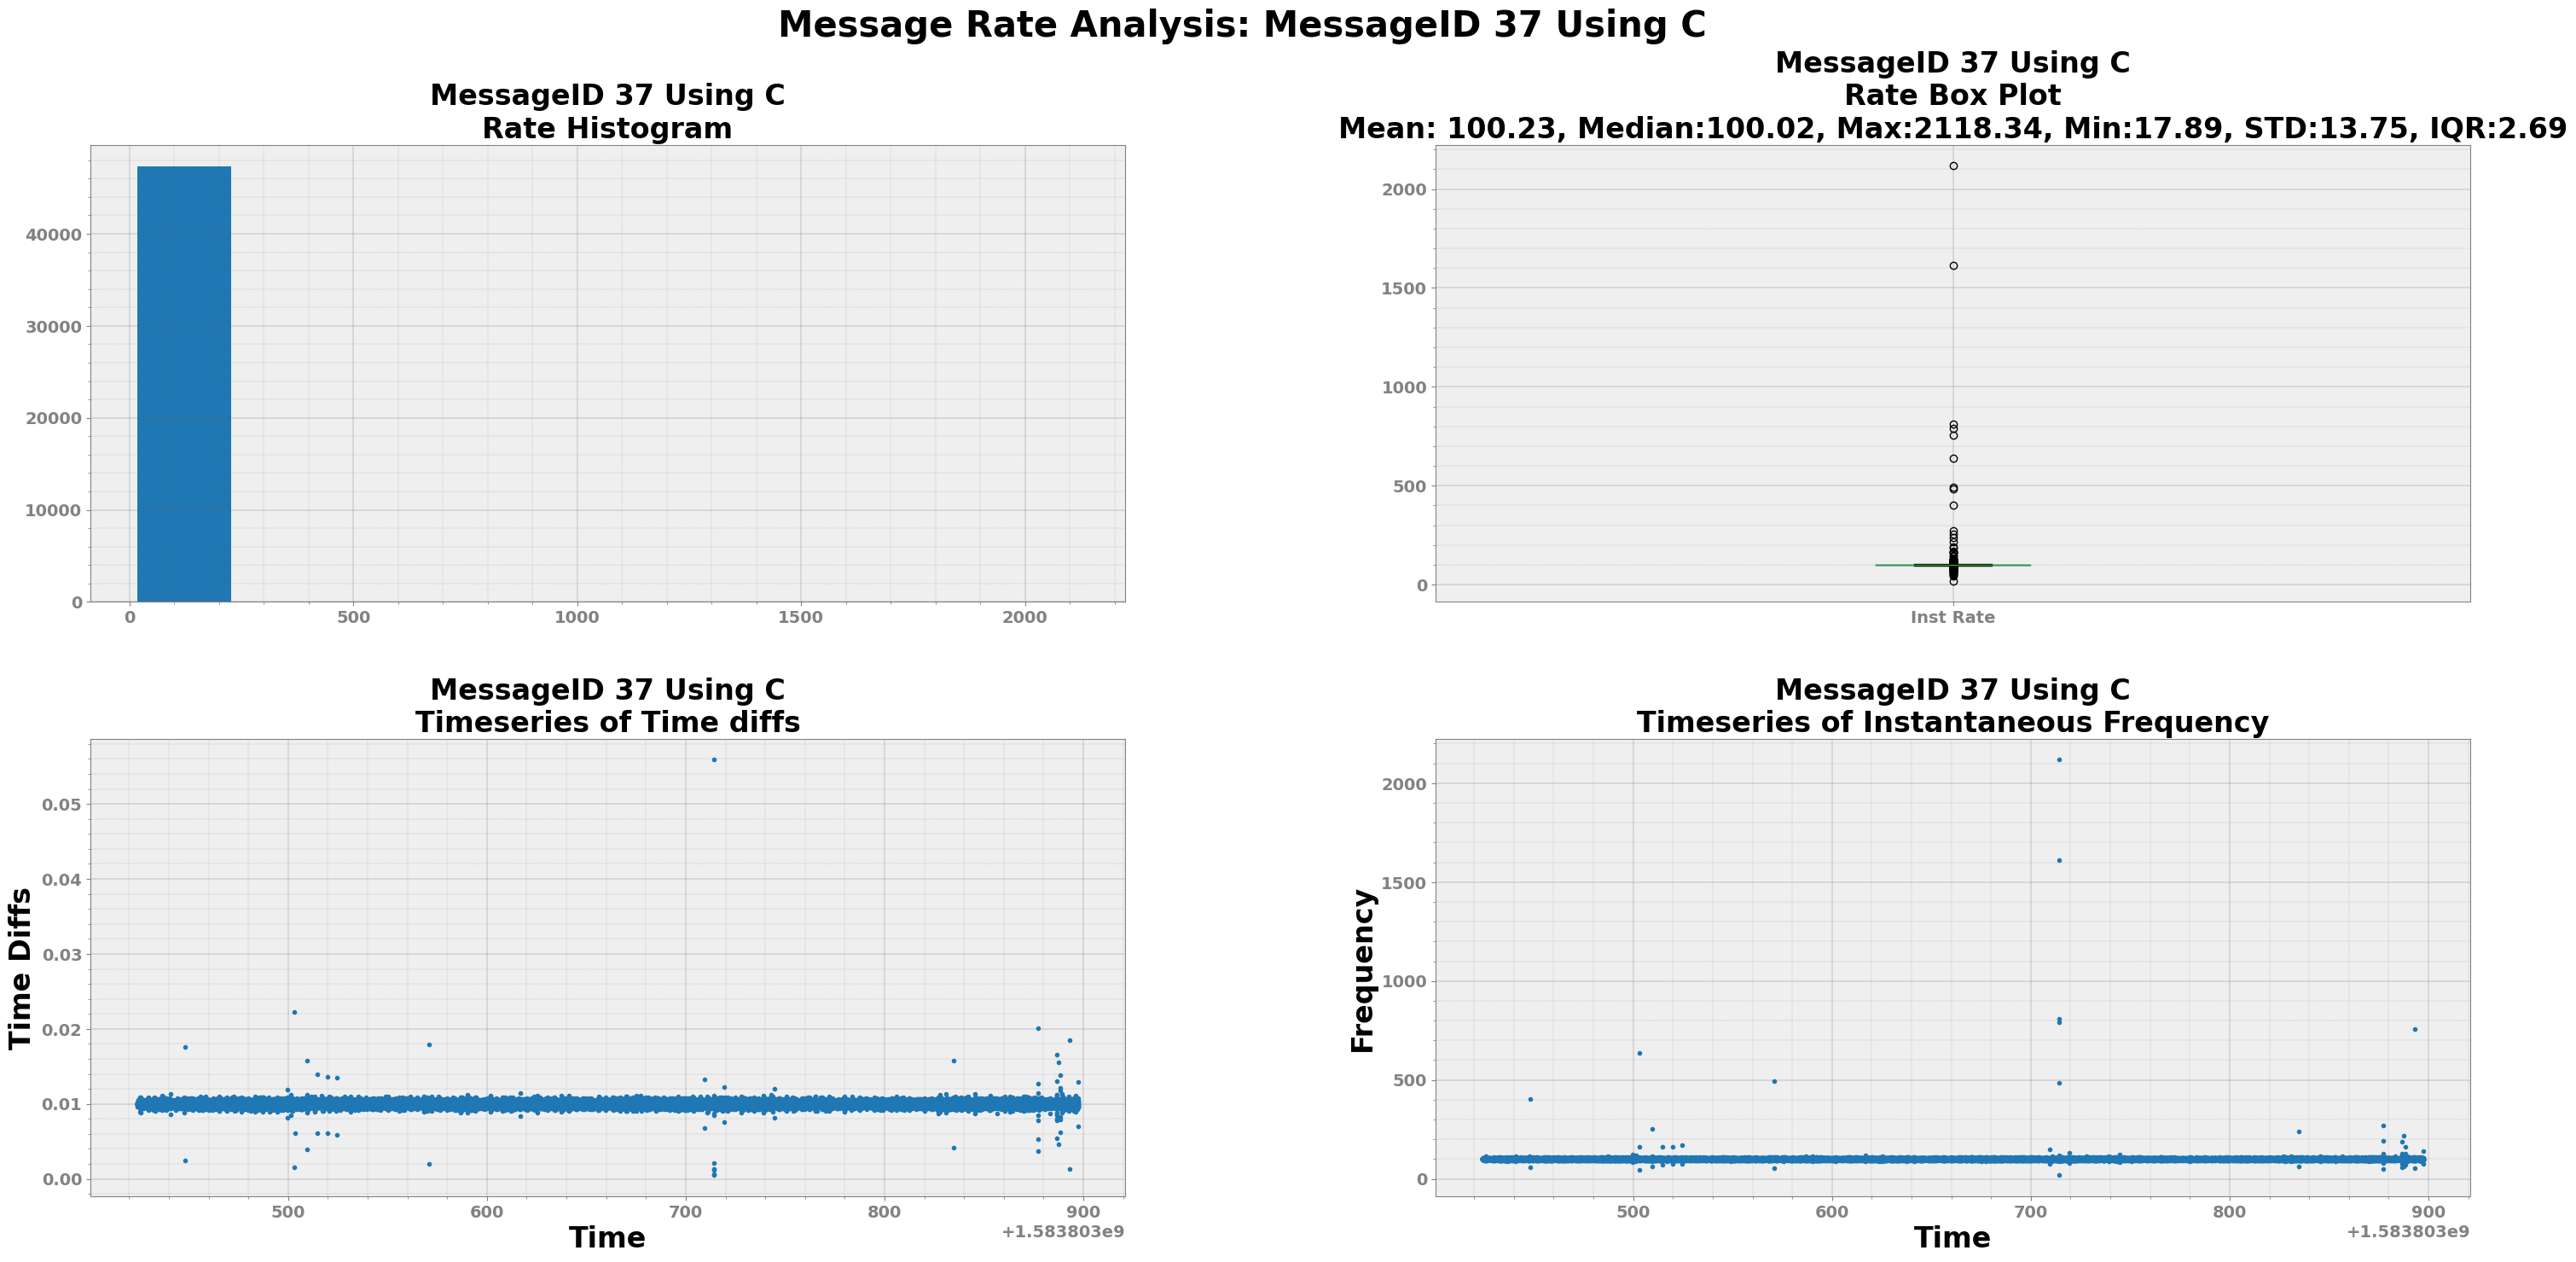

Analyzing Timestamp and Data Rate of MessageID 384 Using Python
Interquartile Range of Rate for MessageID 384 Using Python is 2.7788708744077715 


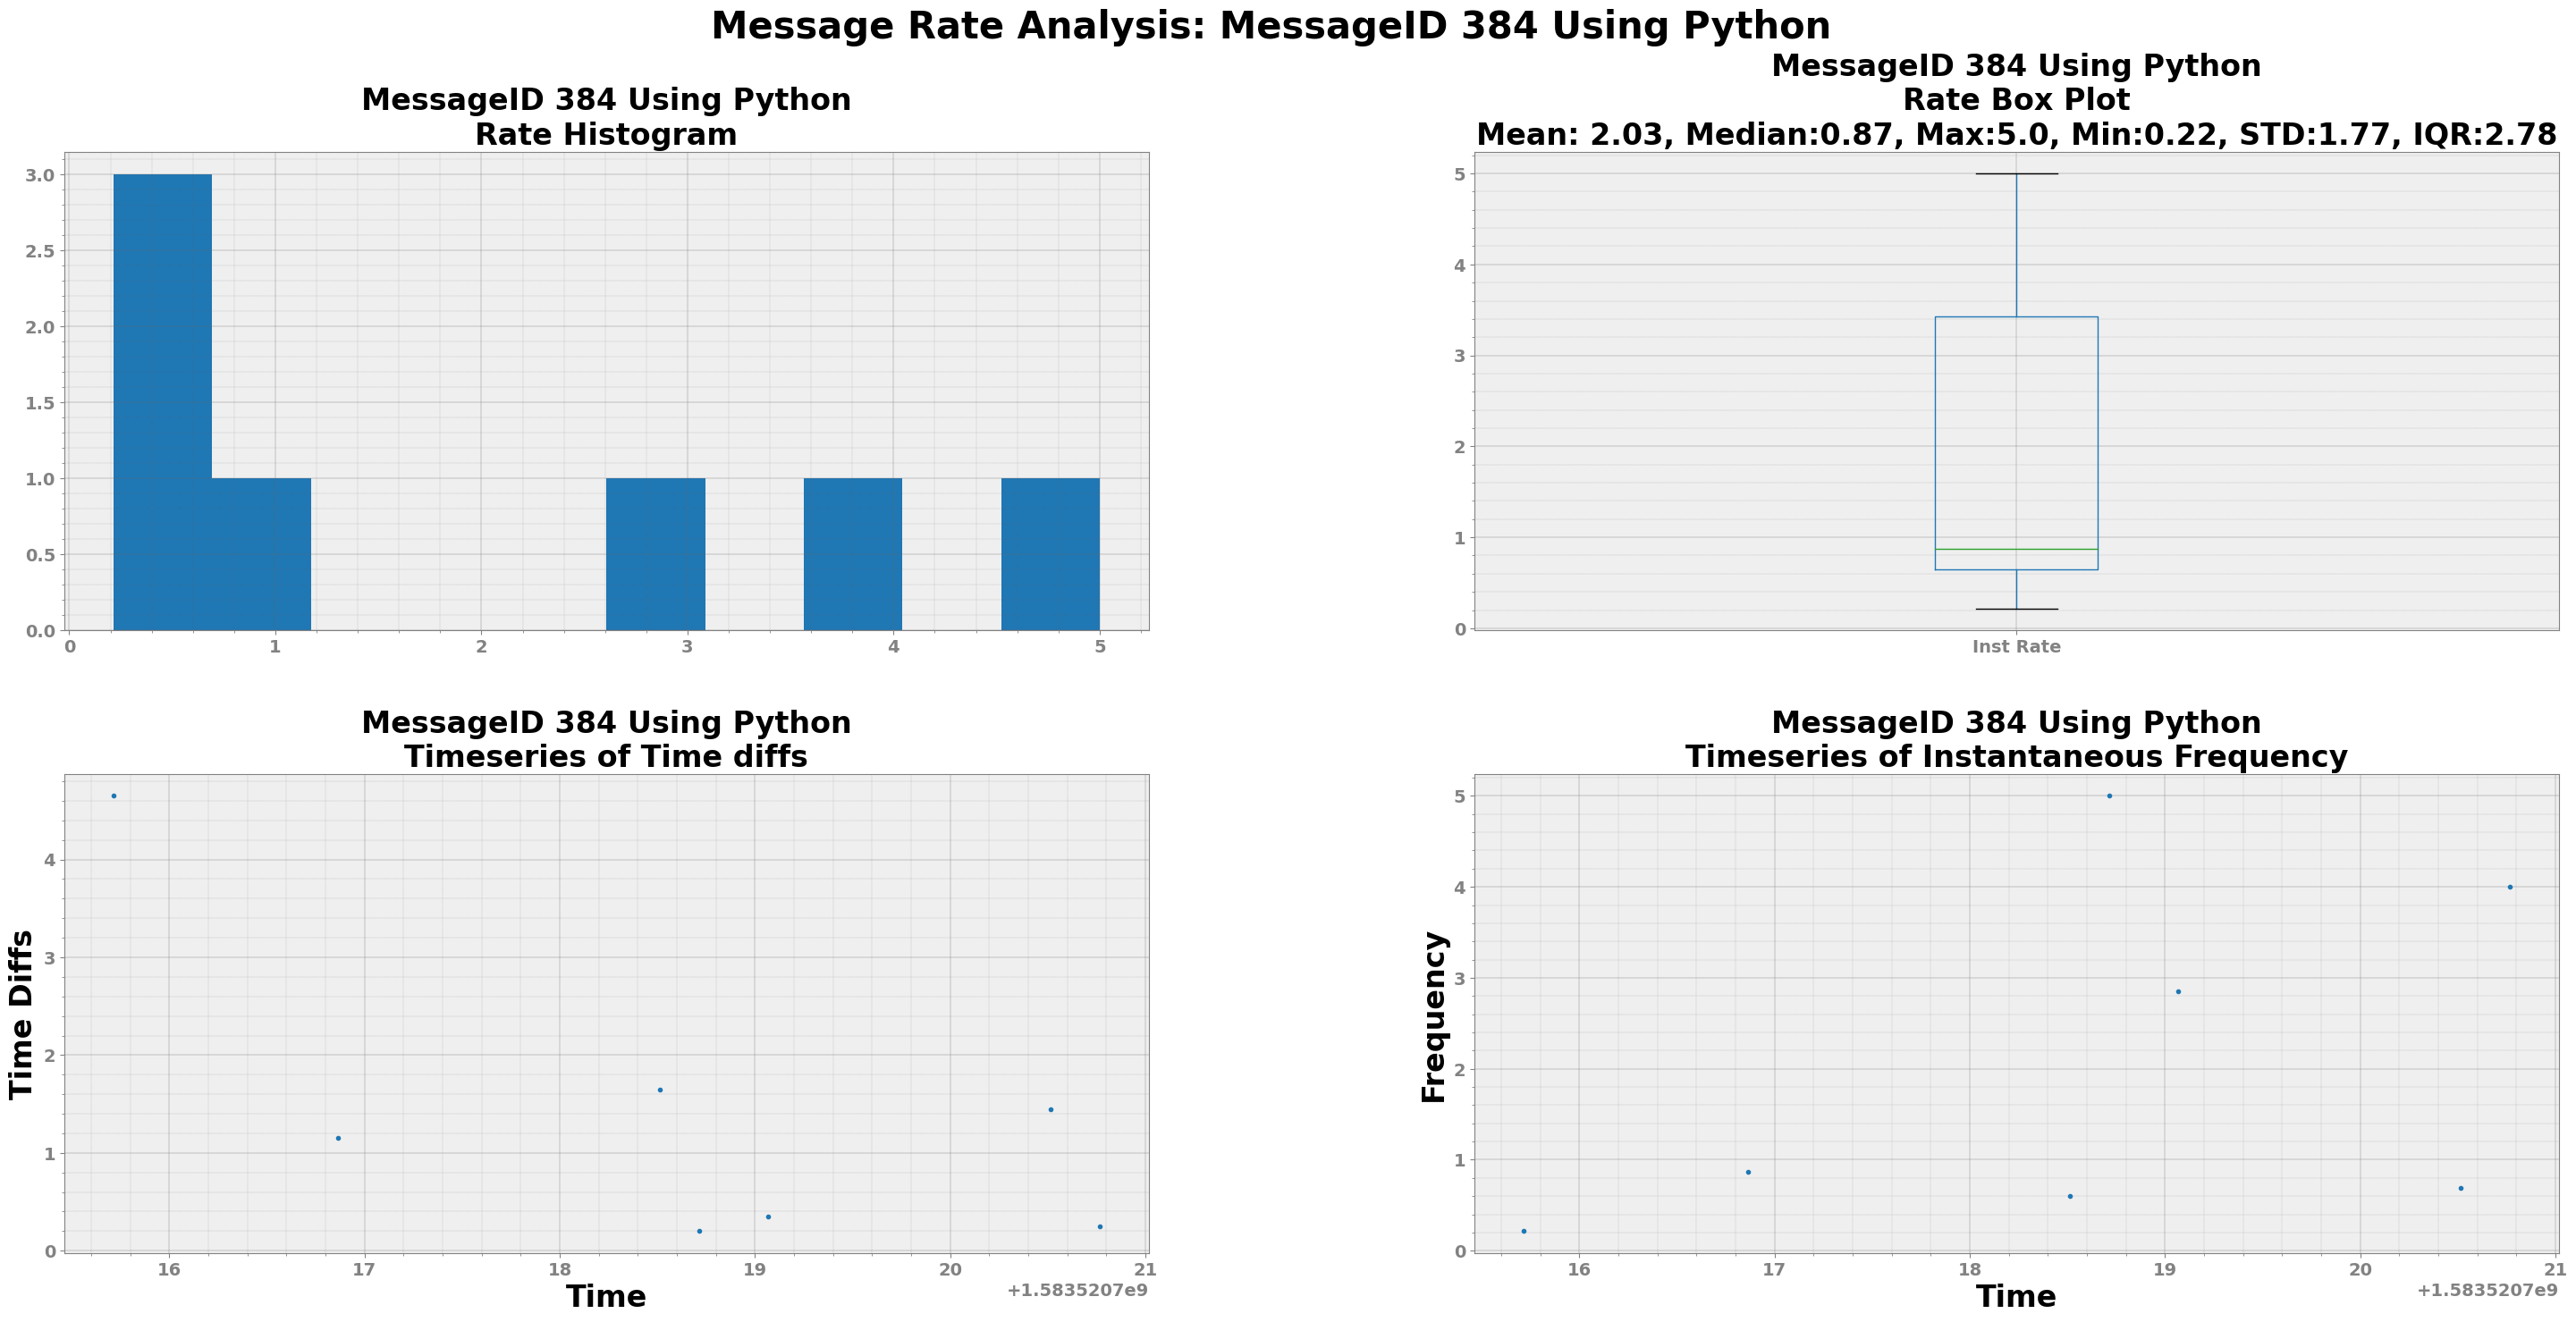

6308
Analyzing Timestamp and Data Rate of MessageID 384 Using C
Interquartile Range of Rate for MessageID 384 Using C is 0.12435701215000705 


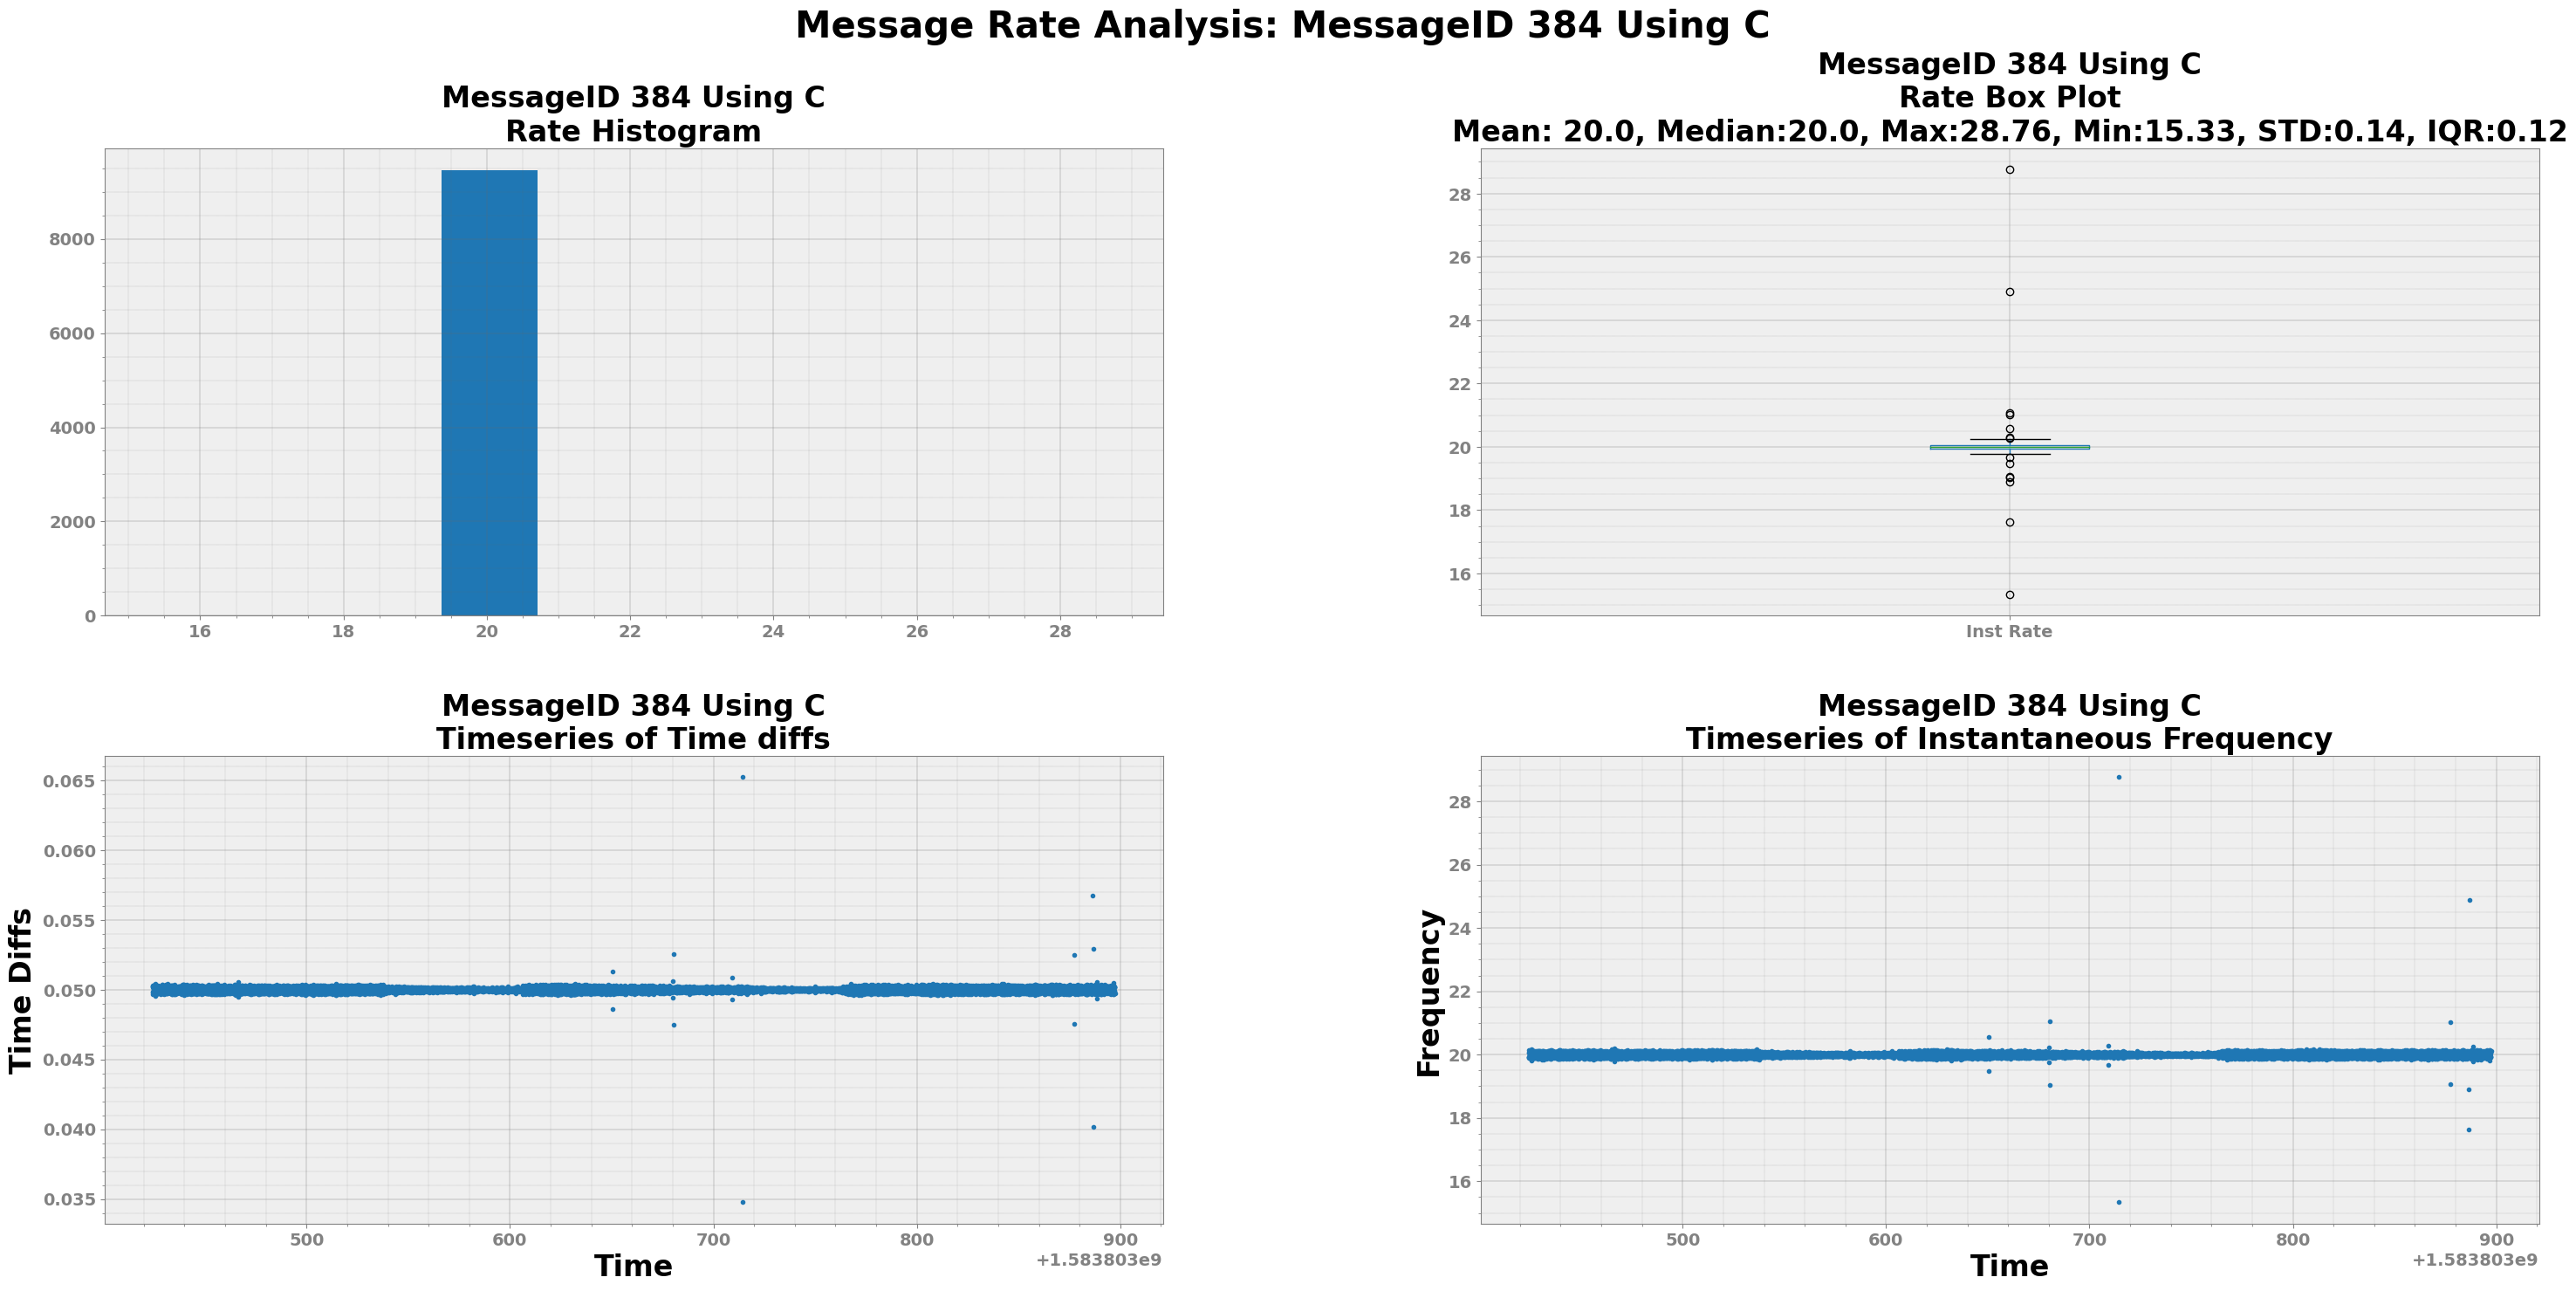

In [17]:
for index in msgsOfInterest:
    m_data = pyframe[pyframe['MessageID'] == index ]
    strym.ranalyze(m_data, title ="MessageID " + str(index) + " Using Python", savefig=True)
    
    n_data = cframe[cframe['MessageID'] == index ]
    n_data = cframe[cframe['MessageID'] == index ]
    n_msg = n_data.shape[0]
    percent = 40
    n_msg_to_trunc = (n_msg*percent)/100
    n_msg_to_trunc= int(n_msg_to_trunc)
    print(n_msg_to_trunc)
    n_data = n_data[n_msg_to_trunc:]
    strym.ranalyze(n_data, title ="MessageID " + str(index) + " Using C", savefig = True)